# EVALUATION-PHASE-1

# PROJECT NAME--TEMPERATURE PREDICTION ANALYSIS 

In [ ]:
PROBLEM STATEMENT:  The problem statement here is to detect next day minimum and next day maximum temperatures accurately 
considering the different inputs like present day min and max temperatures, station, cloud covering, precipitation and others. 

# Importing necessary libraries

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Downloading the dataset from Kaggle into my system and calling it as df here in Jupyter Notebook using pd.read_csv

In [12]:
df=pd.read_csv("temp[1].csv")
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

In [3]:
df.shape

(7752, 25)

This dataset contains 7752 rows and a total of 25 columns along with dependent as well as independent variables.

In [3]:
df.head()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [4]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

In [5]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [6]:
df.columns.to_list()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

We can see different columns in a list format. Some of them for example are station, date, present Temperature maximum, present Temperature minium, latitude, longitude, DEM is elevation, slope, solar
radiation of the particular place.



(Local Data Assimilation and Prediction System - (LDAPS) Model)

'Next_Tmax' and 'Next_Tmin' are the target variables which we need to predict and they are of 
continuous type.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7752 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [ ]:
The dataset shows all float values and just Date as object type. The memory usage is 1.5+ MB. We have
25 columns. EAch variable shows non-null values respectively.

# Calculating value_counts()

In [134]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

23.0    281
18.0    279
13.0    276
19.0    276
8.0     276
9.0     276
2.0     275
24.0    275
22.0    274
16.0    274
25.0    274
11.0    273
15.0    272
12.0    271
14.0    271
6.0     270
21.0    270
10.0    269
4.0     269
3.0     266
7.0     265
5.0     265
17.0    257
1.0     256
20.0    251
Name: station, dtype: int64


31.4    101
29.4    101
29.1    100
30.6     98
31.9     98
       ... 
36.3      1
37.1      1
21.4      1
21.6      1
36.4      1
Name: Present_Tmax, Length: 159, dtype: int64


23.8    138
24.0    136
23.3    132
23.7    129
23.5    127
       ... 
16.4      1
29.9      1
29.7      1
29.1      1
16.3      1
Name: Present_Tmin, Length: 135, dtype: int64


51.810596    2
77.030350    2
71.658089    2
58.767471    1
57.183861    1
            ..
50.394829    1
47.393318    1
53.356937    1
58.979343    1
22.933014    1
Name: LDAPS_RHmin, Length: 6758, dtype: int64


91.206520    2
92.531029    2
91.776146    2
91.878174    2
94.795967    2
            ..
95.8289

In [3]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [4]:
df.isnull().sum().sum()

1248

<AxesSubplot:ylabel='Date'>

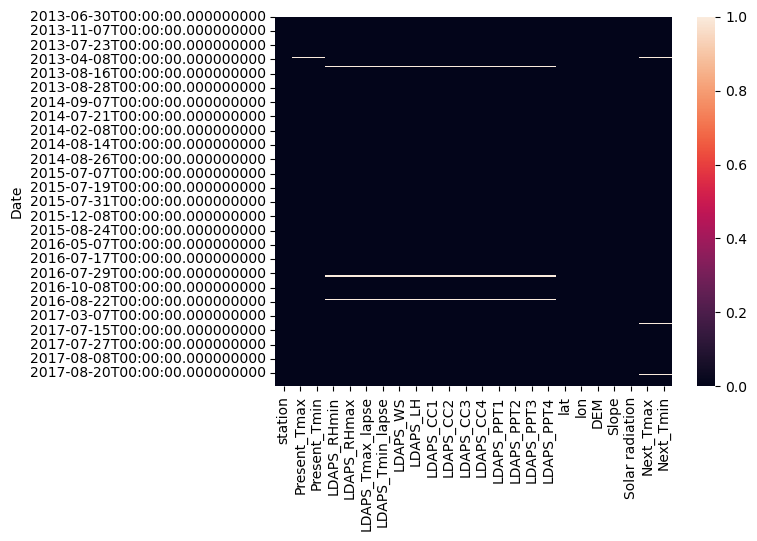

In [77]:
sns.heatmap(df.isnull())

There are a total of 1248 null values in the dataset.

In [13]:
df['Date']=df['Date'].fillna(df['Date'].mode()[0])
df['station']=df['station'].fillna(df['station'].mean())

# The Date column is showing as object type, we need to convert to Datetime format.

In [14]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].apply(lambda x:x.day)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Year']=df['Date'].apply(lambda x:x.year)
df.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7752 non-null   float64       
 1   Date              7752 non-null   datetime64[ns]
 2   Present_Tmax      7682 non-null   float64       
 3   Present_Tmin      7682 non-null   float64       
 4   LDAPS_RHmin       7677 non-null   float64       
 5   LDAPS_RHmax       7677 non-null   float64       
 6   LDAPS_Tmax_lapse  7677 non-null   float64       
 7   LDAPS_Tmin_lapse  7677 non-null   float64       
 8   LDAPS_WS          7677 non-null   float64       
 9   LDAPS_LH          7677 non-null   float64       
 10  LDAPS_CC1         7677 non-null   float64       
 11  LDAPS_CC2         7677 non-null   float64       
 12  LDAPS_CC3         7677 non-null   float64       
 13  LDAPS_CC4         7677 non-null   float64       
 14  LDAPS_PPT1        7677 n

We have converted date to datetime as shown in info function.

# Setting Date as the index column

In [15]:
df.set_index('Date', inplace=True)
df

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688    91.116364   
2013-06-30      2.0          31.9          21.6    52.263397    90.604721   
2013-06-30      3.0          31.6          23.3    48.690479    83.973587   
2013-06-30      4.0          32.0          23.4    58.239788    96.483688   
2013-06-30      5.0          31.4          21.9    56.174095    90.155128   
...             ...           ...           ...          ...          ...   
2017-08-30     23.0          23.3          17.1    26.741310    78.869858   
2017-08-30     24.0          23.3          17.7    24.040634    77.294975   
2017-08-30     25.0          23.2          17.4    22.933014    77.243744   
2013-01-07     13.0          20.0          11.3    19.794666    58.936283   
2013-01-07     13.0          37.6          29.9    98.524734   100.000153   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
Date                                                                    
2013-06-30         28.074101         23.006936   6.818887   69.451805   
2013-06-30         29.850689         24.035009   5.691890   51.937448   
2013-06-30         30.091292         24.565633   6.138224   20.573050   
2013-06-30         29.704629         23.326177   5.650050   65.727144   
2013-06-30         29.113934         23.486480   5.735004  107.965535   
...                      ...               ...        ...         ...   
2017-08-30         26.352081         18.775678   6.148918   72.058294   
2017-08-30         27.010193         18.733519   6.542819   47.241457   
2017-08-30         27.939516         18.522965   7.289264    9.090034   
2013-01-07         17.624954         14.272646   2.882580  -13.603212   
2013-01-07         38.542255         29.619342  21.857621  213.414006   

            LDAPS_CC1  ...      lat      lon       DEM     Slope  \
Date                   ...                                         
2013-06-30   0.233947  ...  37.6046  126.991  212.3350  2.785000   
2013-06-30   0.225508  ...  37.6046  127.032   44.7624  0.514100   
2013-06-30   0.209344  ...  37.5776  127.058   33.3068  0.266100   
2013-06-30   0.216372  ...  37.6450  127.022   45.7160  2.534800   
2013-06-30   0.151407  ...  37.5507  127.135   35.0380  0.505500   
...               ...  ...      ...      ...       ...       ...   
2017-08-30   0.030034  ...  37.5372  126.891   15.5876  0.155400   
2017-08-30   0.035874  ...  37.5237  126.909   17.2956  0.222300   
2017-08-30   0.048954  ...  37.5237  126.970   19.5844  0.271300   
2013-01-07   0.000000  ...  37.4562  126.826   12.3700  0.098475   
2013-01-07   0.967277  ...  37.6450  127.135  212.3350  5.178230   

            Solar radiation  Next_Tmax  Next_Tmin  Day  Month  Year  
Date                                                                 
2013-06-30      5992.895996       29.1       21.2   30      6  2013  
2013-06-30      5869.312500       30.5       22.5   30      6  2013  
2013-06-30      5863.555664       31.1       23.9   30      6  2013  
2013-06-30      5856.964844       31.7       24.3   30      6  2013  
2013-06-30      5859.552246       31.2       22.5   30      6  2013  
...                     ...        ...        ...  ...    ...   ...  
2017-08-30      4443.313965       28.3       18.1   30      8  2017  
2017-08-30      4438.373535       28.6       18.8   30      8  2017  
2017-08-30      4451.345215       27.8       17.4   30      8  2017  
2013-01-07      4329.520508       17.4       11.3    7      1  2013  
2013-01-07      5992.895996       38.9       29.8    7      1  2013  

[7752 rows x 27 columns]

In [ ]:
#I did not use df.dropna(inplace=True) because there will be loss of data as many columns have
#missing data

In [16]:
#Replacing the null values with mean
df['Present_Tmax']=df['Present_Tmax'].fillna(df['Present_Tmax'].mean())
df['Present_Tmin']=df['Present_Tmin'].fillna(df['Present_Tmin'].mean())
df['LDAPS_RHmin']=df['LDAPS_RHmin'].fillna(df['LDAPS_RHmin'].mean())
df['LDAPS_RHmax']=df['LDAPS_RHmax'].fillna(df['LDAPS_RHmax'].mean())
df['LDAPS_Tmax_lapse']=df['LDAPS_Tmax_lapse'].fillna(df['LDAPS_Tmax_lapse'].mean())
df['LDAPS_Tmin_lapse']=df['LDAPS_Tmin_lapse'].fillna(df['LDAPS_Tmin_lapse'].mean())
df['LDAPS_WS']=df['LDAPS_WS'].fillna(df['LDAPS_WS'].mean())
df['LDAPS_LH']=df['LDAPS_LH'].fillna(df['LDAPS_LH'].mean())
df['LDAPS_CC1']=df['LDAPS_CC1'].fillna(df['LDAPS_CC1'].mean())
df['LDAPS_CC2']=df['LDAPS_CC2'].fillna(df['LDAPS_CC2'].mean())
df['LDAPS_CC3']=df['LDAPS_CC3'].fillna(df['LDAPS_CC3'].mean())
df['LDAPS_CC4']=df['LDAPS_CC4'].fillna(df['LDAPS_CC4'].mean())
df['LDAPS_PPT1']=df['LDAPS_PPT1'].fillna(df['LDAPS_PPT1'].mean())
df['LDAPS_PPT2']=df['LDAPS_PPT2'].fillna(df['LDAPS_PPT2'].mean())
df['LDAPS_PPT3']=df['LDAPS_PPT3'].fillna(df['LDAPS_PPT3'].mean())
df['LDAPS_PPT4']=df['LDAPS_PPT4'].fillna(df['LDAPS_PPT4'].mean())
df['station']=df['station'].fillna(df['station'].mean())
df['Day']=df['Day'].fillna(df['Day'].mean())
df['Month']=df['Month'].fillna(df['Month'].mean())
df['Year']=df['Year'].fillna(df['Year'].mean())

I am filling null values even in target columns as going down further, since 2 targets are there, VIF and other techniques
give problems with missing values if either of the target is considered. 

In [17]:
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())

In [18]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Day                 0
Month               0
Year                0
dtype: int64

In [12]:
df.nunique().to_frame("Unique Values of whole data")

Unique Values of whole data
station                                    25
Present_Tmax                              168
Present_Tmin                              156
LDAPS_RHmin                              7673
LDAPS_RHmax                              7665
LDAPS_Tmax_lapse                         7676
LDAPS_Tmin_lapse                         7676
LDAPS_WS                                 7676
LDAPS_LH                                 7676
LDAPS_CC1                                7570
LDAPS_CC2                                7583
LDAPS_CC3                                7600
LDAPS_CC4                                7525
LDAPS_PPT1                               2813
LDAPS_PPT2                               2511
LDAPS_PPT3                               2357
LDAPS_PPT4                               1919
lat                                        12
lon                                        25
DEM                                        25
Slope                                      27
Solar radiation                          1575
Next_Tmax                                 184
Next_Tmin                                 158
Day                                        21
Month                                      12
Year                                        5

In [13]:
df['Next_Tmax'].nunique()

184

In [14]:
df['Next_Tmin'].nunique()

158

# Considering next tmax and next tmin as targets, these are of float data types. There 183 and 157 unique values. These targets can be predicted by applying Regression methods. LinearRegression and other regressor algorithms can be applied to check out the best model

In [15]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7752.000000   7752.000000   7752.000000  7752.000000  7752.000000   
mean     13.000000     29.768211     23.225059    56.759372    88.374804   
std       7.210637      2.956557      2.403036    14.596973     7.157124   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.046162    84.316923   
50%      13.000000     29.900000     23.400000    55.313244    89.699505   
75%      19.000000     32.000000     24.900000    67.038254    93.704500   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7752.000000       7752.000000  7752.000000  7752.000000   
mean          29.613447         23.512589     7.097875    62.505019   
std            2.932898          2.333973     2.173245    33.567001   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693091         22.114651     5.686487    37.532764   
50%           29.662273         23.735942     6.563068    57.310630   
75%           31.683819         25.134000     8.007471    83.904586   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat          lon          DEM        Slope  \
count  7752.000000  ...  7752.000000  7752.000000  7752.000000  7752.000000   
mean      0.368774  ...    37.544722   126.991397    61.867972     1.257048   
std       0.261185  ...     0.050352     0.079435    54.279780     1.370444   
min       0.000000  ...    37.456200   126.826000    12.370000     0.098475   
25%       0.148321  ...    37.510200   126.937000    28.700000     0.271300   
50%       0.320110  ...    37.550700   126.995000    45.716000     0.618000   
75%       0.571696  ...    37.577600   127.042000    59.832400     1.767800   
max       0.967277  ...    37.645000   127.135000   212.335000     5.178230   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7752.000000  7752.000000  7752.000000  7752.000000  7752.000000   
mean       5341.502803    30.274887    22.932220    16.368550     7.079076   
std         429.158867     3.122557     2.483276     8.241642     2.240205   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        4999.018555    28.200000    21.400000     8.000000     7.000000   
50%        5436.345215    30.500000    23.100000    16.000000     7.000000   
75%        5728.316406    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7752.000000  
mean   2014.999484  
std       1.414487  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

In [ ]:
Observations:
1. All the row counts are equal. No missing values an no negative values, and so summary is perfect.
2. Mean is greater than median for columns LDAPS-RHmin, DLAPS_WS, LDAPS_LH,LDAPS_CC!, DEM, slope, and
   Day. For these columns, there will be a right-ward skewness.
   Mean is lesser than median for columns Present Tmax, Ppresent_Tmin, LDAPS-RHmax, LDAPS_Tmin_lapse, 
   solar_radiation, Next_Tmax, Next_Tmin
   Mean and median are same for station, LDAPS_Tmax_lapse, latitude and longitude, month and year.
3. There are outliers as there is difference between 75% and max values.
4. Standard deviation is less than 1 only for longitude, latitude, LDAPS_CC1 and others have more
   standard deviation, so the data is spread vastly.

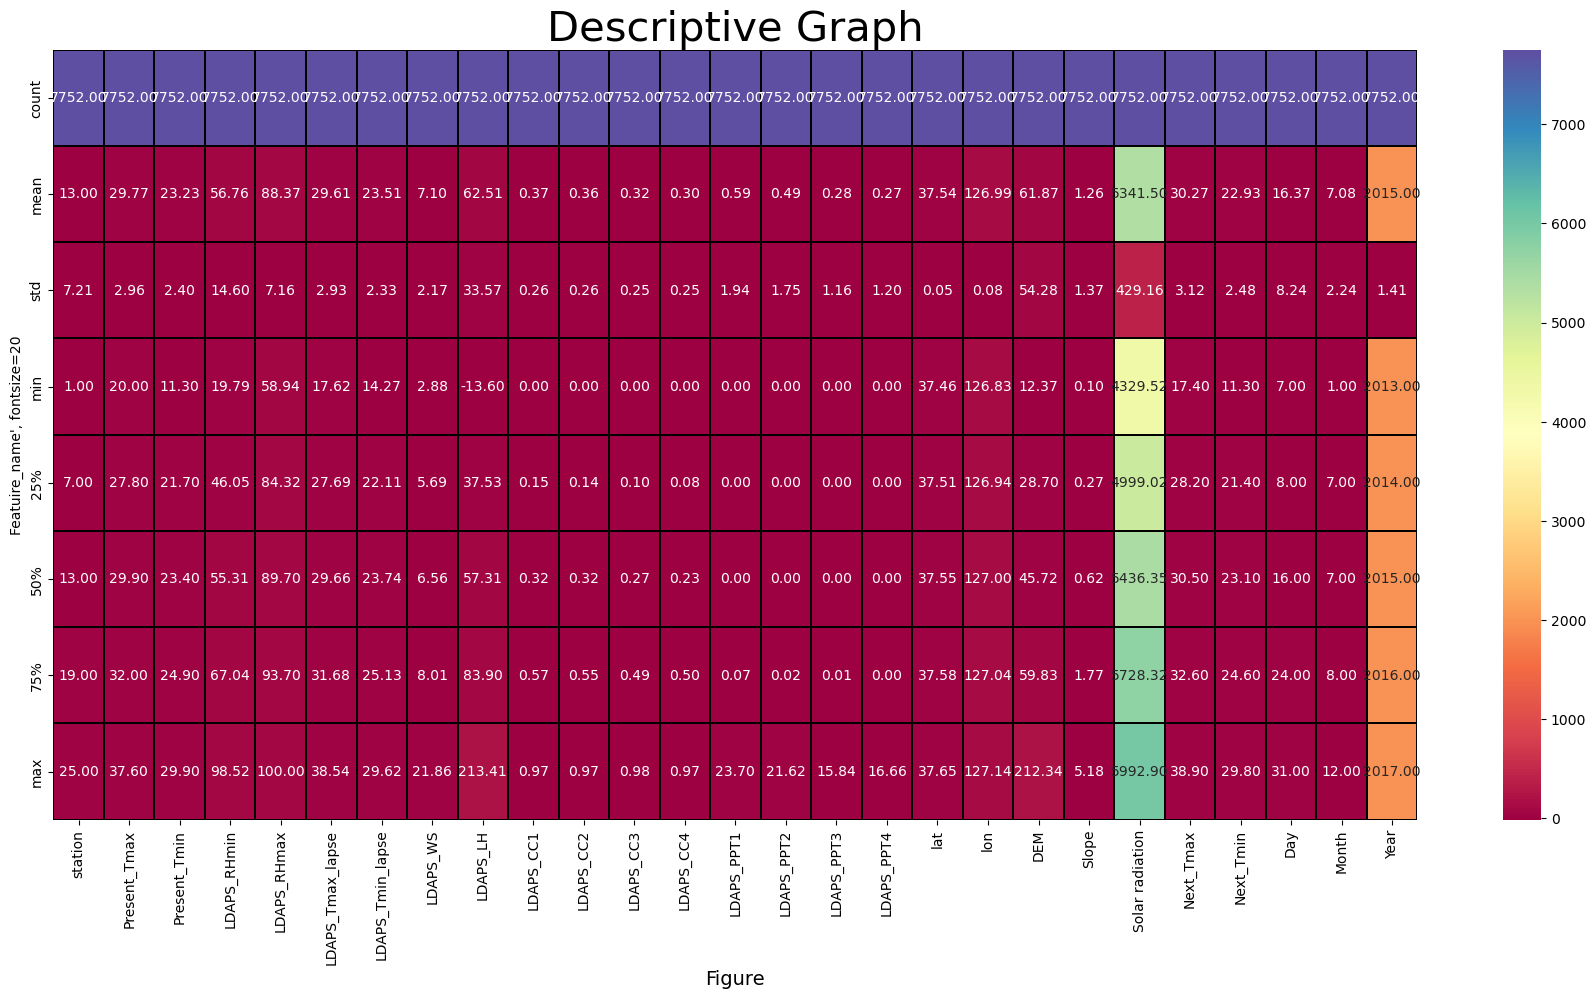

In [16]:
plt.figure(figsize=(22, 10))
sns.heatmap(df.describe(), annot=True, fmt='0.2f', linewidth=0.2, linecolor='black', cmap='Spectral')
plt.xlabel('Figure', fontsize=14)
plt.ylabel("Featuire_name', fontsize=20")
plt.title("Descriptive Graph", fontsize=30)
plt.show()


The heatmap shows the same details as the df.describe method. 

# Graphical Explanatory Data Analysis


# Univariate Analysis using Countplots

Since there are 2 variables and it will take lot of space and cumbersome if done individually, I am
trying use subplots which I learned when I referred on Google. 

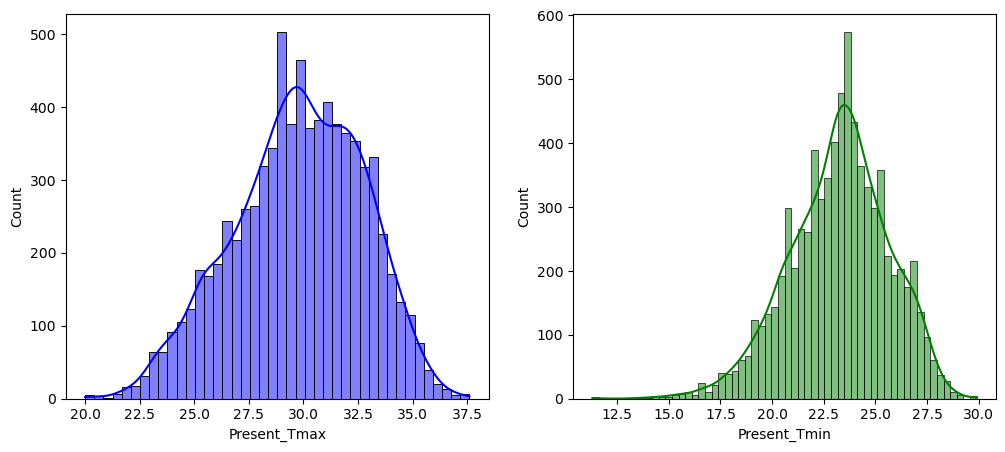

In [57]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Present_Tmax'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['Present_Tmin'],kde=True,color='g')
plt.show()


In [ ]:
There is a slight left-skewed curve for the target variable. (next maximum temperature )

In [ ]:
Next minimum temperature also shows a left ward skewness.

13.0    312
14.0    310
24.0    310
23.0    310
22.0    310
21.0    310
20.0    310
19.0    310
18.0    310
17.0    310
16.0    310
15.0    310
1.0     310
2.0     310
12.0    310
11.0    310
10.0    310
9.0     310
8.0     310
7.0     310
6.0     310
5.0     310
4.0     310
3.0     310
25.0    310
Name: station, dtype: int64


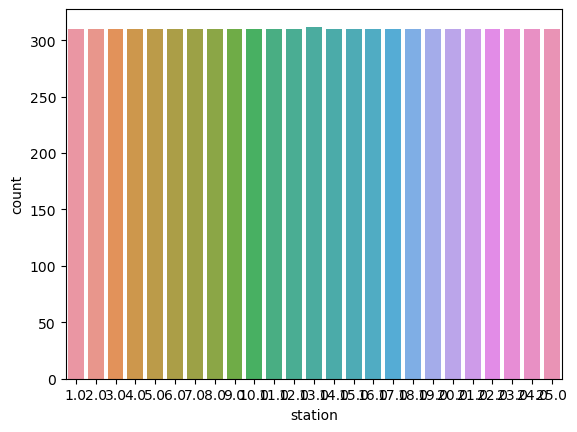

In [15]:
sns.countplot(x='station', data=df)
print(df['station'].value_counts())
plt.show()

There are total 25 stations and all have equal counts.

<AxesSubplot:xlabel='Slope', ylabel='count'>

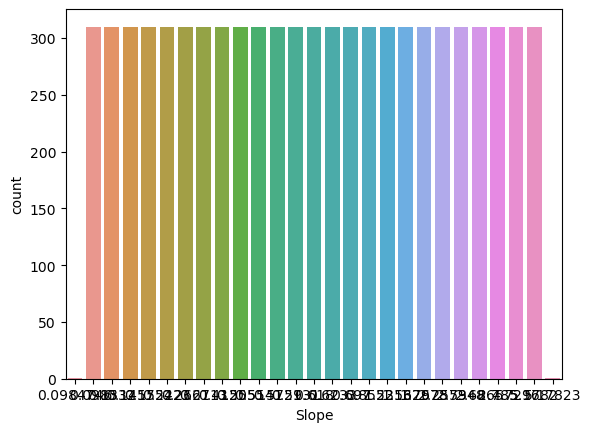

In [111]:
sns.countplot(x='Slope', data=df)


In [ ]:
Again we have slope also having equal value counts of each value. 

array([[<AxesSubplot:title={'center':'station'}>,
        <AxesSubplot:title={'center':'Present_Tmax'}>,
        <AxesSubplot:title={'center':'Present_Tmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmin'}>,
        <AxesSubplot:title={'center':'LDAPS_RHmax'}>],
       [<AxesSubplot:title={'center':'LDAPS_Tmax_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_Tmin_lapse'}>,
        <AxesSubplot:title={'center':'LDAPS_WS'}>,
        <AxesSubplot:title={'center':'LDAPS_LH'}>,
        <AxesSubplot:title={'center':'LDAPS_CC1'}>],
       [<AxesSubplot:title={'center':'LDAPS_CC2'}>,
        <AxesSubplot:title={'center':'LDAPS_CC3'}>,
        <AxesSubplot:title={'center':'LDAPS_CC4'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT1'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT2'}>],
       [<AxesSubplot:title={'center':'LDAPS_PPT3'}>,
        <AxesSubplot:title={'center':'LDAPS_PPT4'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'lon'}

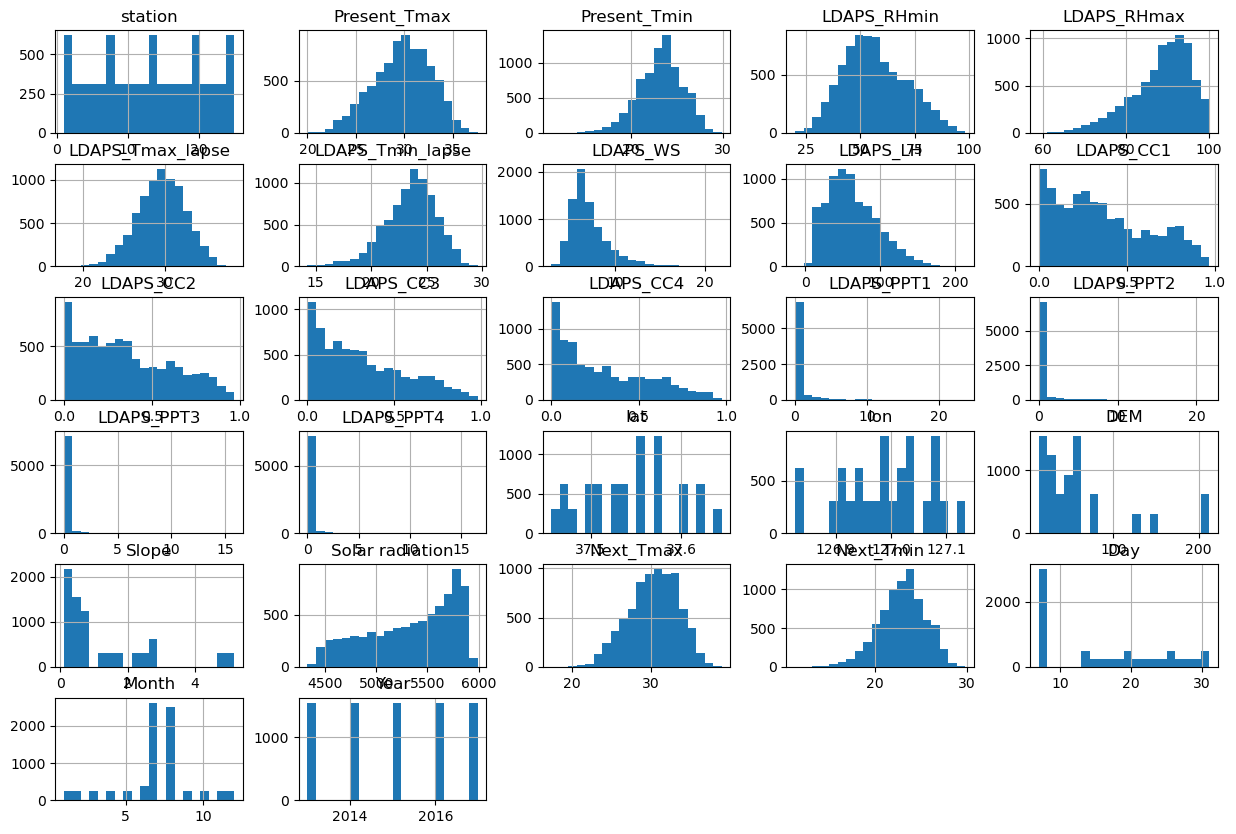

In [20]:
df.hist(bins=20, figsize=(15, 10))

In [ ]:
Station, year, has same values. 
Normal curves: Present_Tmax, LDAPS_RHmin, LDAPS_CC2, lat and long and month variables.
Left skewed curves: LDAPS_WS, LDAPS_RHmax, LDAPS_CC1, LDAPS_CC3, Solar radiation.
Righ skewed curves:  LDAPS_PPT1 to PPT4 and LDAPS_CC4} 

# Boxplots for detecting outliers

# considering Next_Tmax is my target

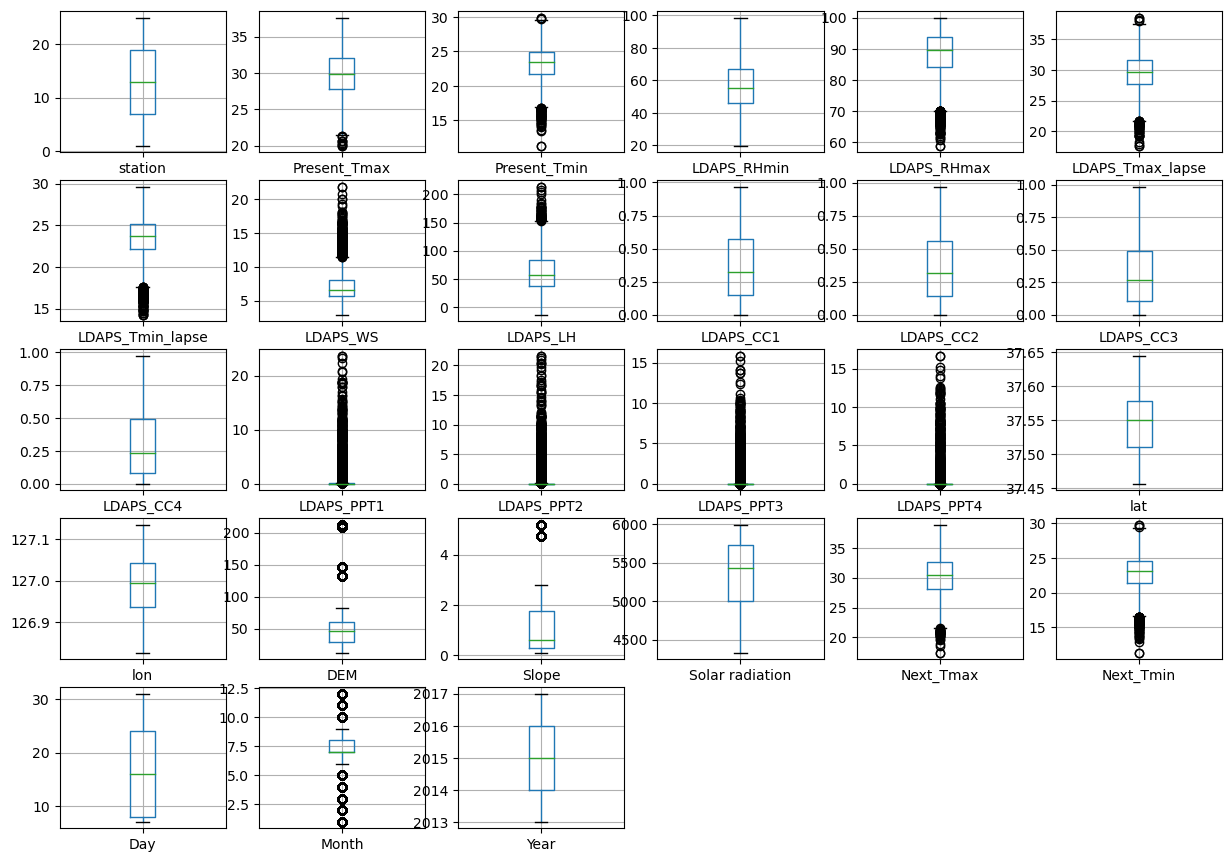

In [19]:
plt.figure(figsize=(15, 15))
plotnumber=1
for columns in df.columns:
    if plotnumber<=27:
        plt.subplot(7, 6, plotnumber)
        df.boxplot(columns)
    plotnumber+=1
plt.show()

There are outliers in Present_Tmax, Present_Tmin, LDAPS_RHmax, LDAPS_Tmax_lapse, LDAPS_Tmin_lapse,
LDAPS_WS,LDAPS_LH, LDAPS_PPT1,LDAPS_PPT2','LDAPS_PPT3', LDAPS_PPT4, DEM, Slope, Next_Tmax, Next_Tmin.

In [11]:
features=df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse',
'LDAPS_WS','LDAPS_LH', 'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope','Month','Next_Tmin']]

In [12]:
from scipy.stats import zscore
z=np.abs(zscore(features))

In [13]:
np.where(z>3)

(array([  25,   25,   26, ..., 7751, 7751, 7751], dtype=int64),
 array([ 5,  8,  8, ...,  8,  9, 10], dtype=int64))

In [22]:
z.iloc[25,5]

3.9161348848797526

In [14]:
df1=df[(z<3).all(axis=1)]

In [24]:
df1.shape

(6907, 27)

In [25]:
df.shape

(7752, 27)

In [15]:
print("Old dataframe:", df.shape[0])
print("New dataframe:", df1.shape[0])
print("Dataloss Percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Old dataframe: 7752
New dataframe: 6895
Dataloss Percentage: 11.055211558307533


There is 10.9=11% data loss, which means more than 10% dataloss. But we will try IQR method and check.
Still we will go ahead with the zscore method only.

In [16]:
q1=features.quantile(0.25)
q3=features.quantile(0.75)
IQR=q3-q1

In [17]:
df2=df[-((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]

In [125]:
df2.shape

(2451, 27)

In [18]:
print("Old dataframe:", df.shape[0])
print("New dataframe:", df2.shape[0])
print("Dataloss Percentage:", ((df.shape[0]-df2.shape[0])/df.shape[0])*100)

Old dataframe: 7752
New dataframe: 2447
Dataloss Percentage: 68.43395252837978


The IQR method is giving 58% data loss which is very critical. We will go ahead with Zscore method. 

In [19]:
df=df1

# Bivariate Analysis

<AxesSubplot:xlabel='station', ylabel='Next_Tmax'>

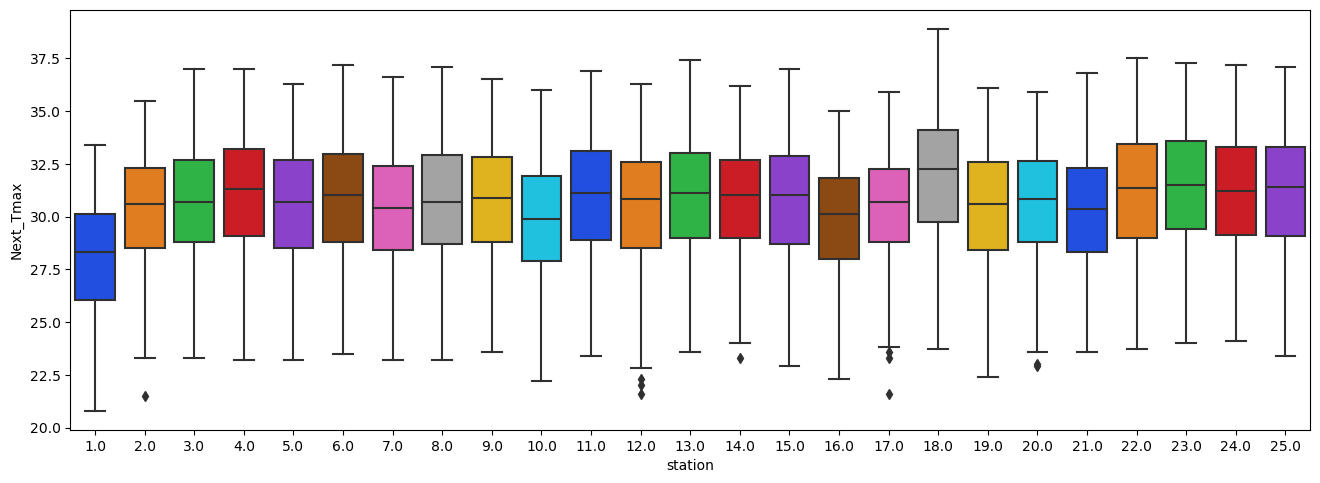

In [24]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(df['station'],df['Next_Tmax'],data=df,palette="bright")

In [ ]:
The station 18 shows highest next maximum temperature and lowest next max temperature is at station 1. 

<AxesSubplot:xlabel='station', ylabel='Next_Tmin'>

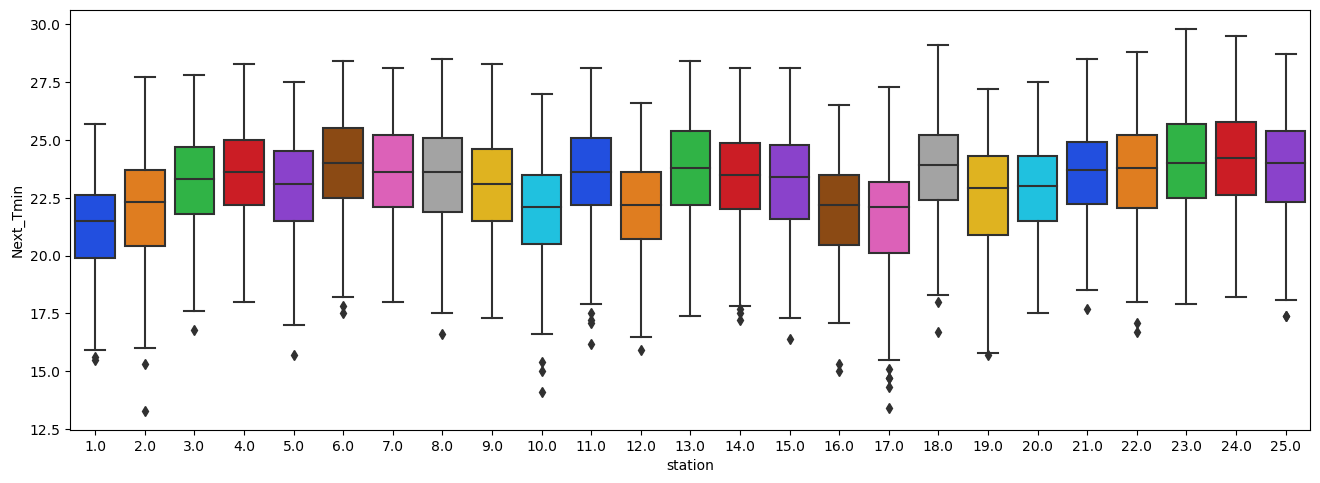

In [25]:
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(df['station'],df['Next_Tmin'],data=df,palette="bright")

In [ ]:
We can see that next minimum highest temperature is at station #23 and lowest next minimun temperature
is at station 17.

# SCATTERPLOTS

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmin'>

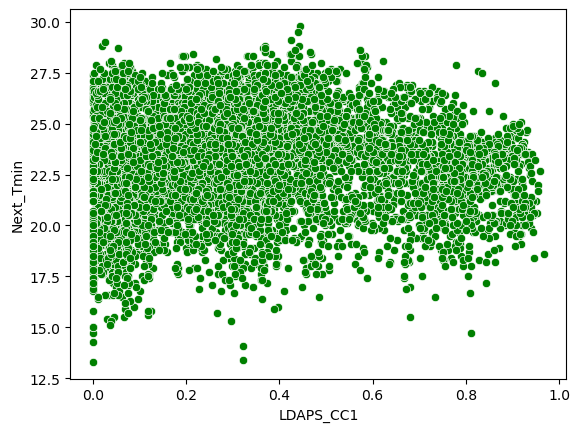

In [68]:
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=df,color="g")


In [ ]:
The plot is uniform and not showing any change as temperature increases.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Next_Tmax'>

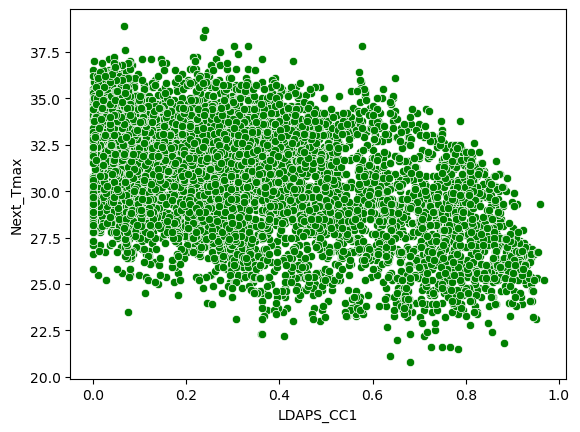

In [148]:
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=df,color="g")

In [ ]:
Here, as the temperature increases, we can see a downwardsloping showing that as temperature increases, after 0.6, there is 
decline of cc1. So there is negative correlation.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmin'>

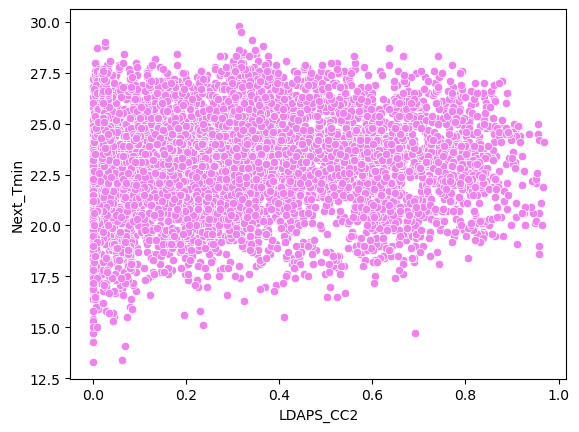

In [146]:
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=df,color='violet')

In [ ]:
There is no change again here also. 

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Next_Tmax'>

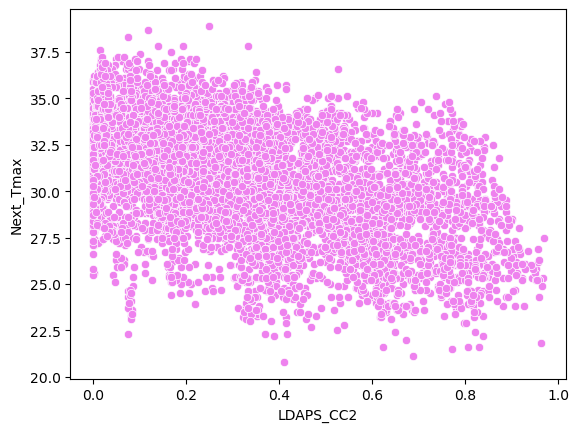

In [147]:
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=df,color='violet')

In [ ]:
We can see a downward sloping, as temperature increase, CC2 decreases. -ve correlation.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmin'>

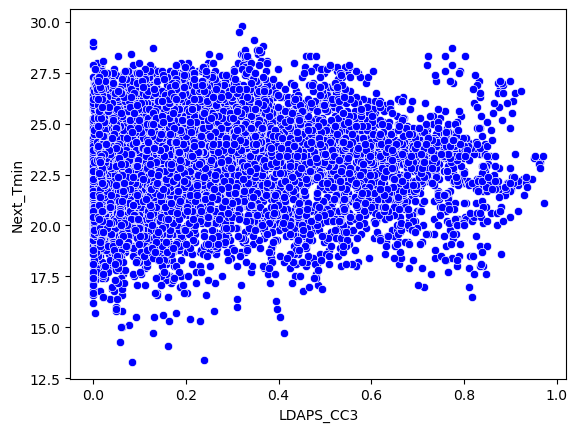

In [150]:
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=df,color='b')

In [ ]:
Same observation as above for mininum temperaure, there is no change.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Next_Tmax'>

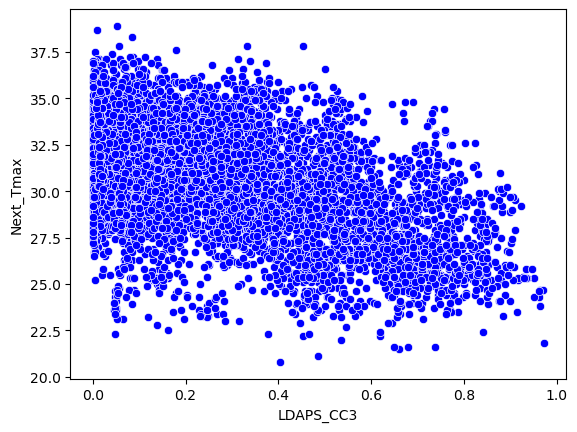

In [152]:
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=df,color='b')

In [ ]:
Here also, there is negative correlation. As the temp increases, after 0.6, the CC3 remains down.

<AxesSubplot:xlabel='LDAPS_CC1', ylabel='Solar radiation'>

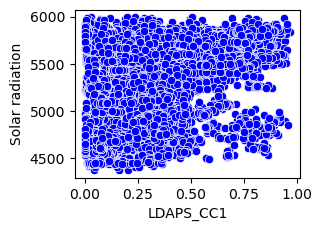

In [135]:
plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=df,color='b')


In [ ]:
There is a positive correlation between LDAPS_CC! and solar radiation.

<AxesSubplot:xlabel='LDAPS_CC2', ylabel='Solar radiation'>

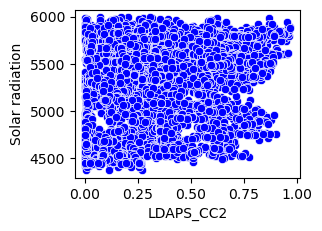

In [136]:
plt.subplot(2,2,2)
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=df,color='b')


There is a +ve correlation between LDAPS_CC3 and Solar radiation.

<AxesSubplot:xlabel='LDAPS_CC3', ylabel='Solar radiation'>

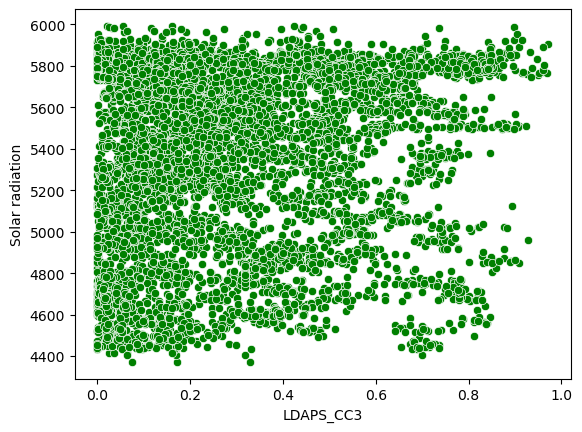

In [139]:
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=df,color="g")

In [ ]:
There is a +ve correlation between LDAPS_CC3 and Solar radiation but not as strong.

<AxesSubplot:xlabel='LDAPS_CC4', ylabel='Solar radiation'>

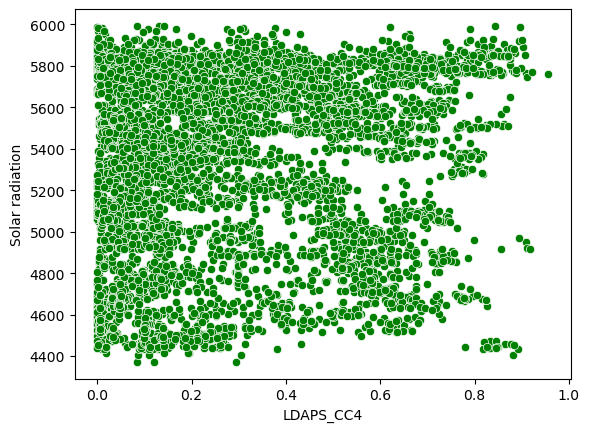

In [140]:
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=df,color="g")

We can see here also same pattern of +ve correlation. There is a positive correlation with LDAPS_CC2 and solar radiation but not a strong one. 

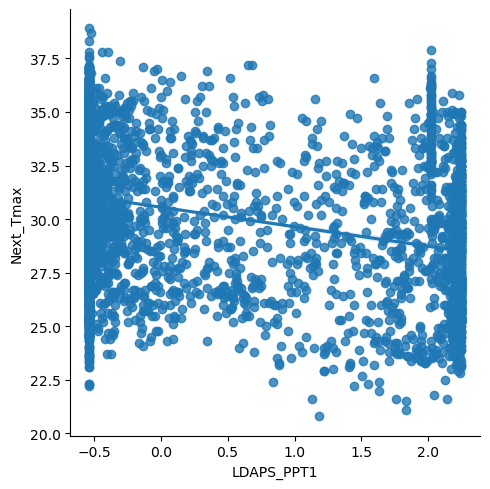

In [35]:
sns.lmplot(x='LDAPS_PPT1',y='Next_Tmax',data=df)

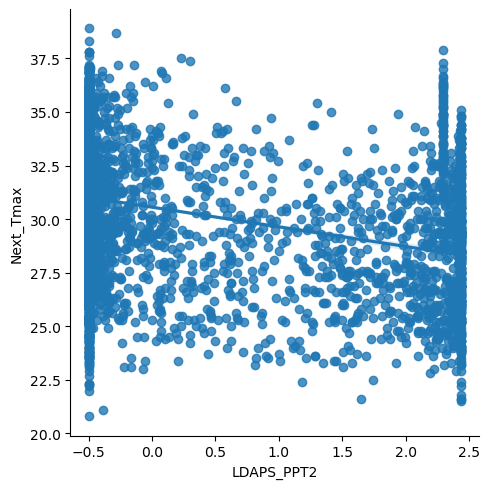

In [36]:
sns.lmplot(x='LDAPS_PPT2',y='Next_Tmax',data=df)

In [ ]:
The LDAPS_PPT1 upto PPT4 columns in comparison to next max and min temperatures are showing a negative
relationship indicating, if one increases, the other decreases.

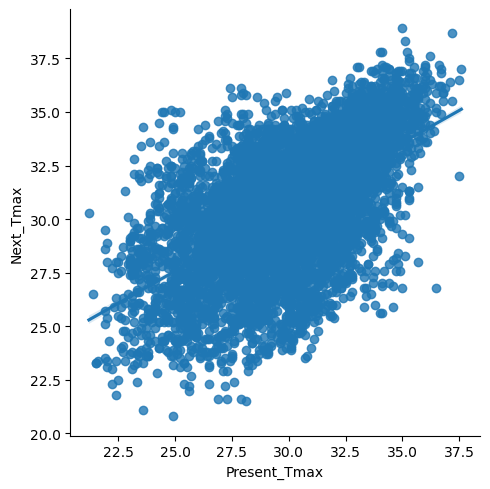

In [153]:
sns.lmplot(x='Present_Tmax', y='Next_Tmax', data=df, palette='colorblind')

The plot itself is suggesting that there is a +ve and a strong correlation between the 2 variables. AS
one increases, the other also increase, so +ve linear one.

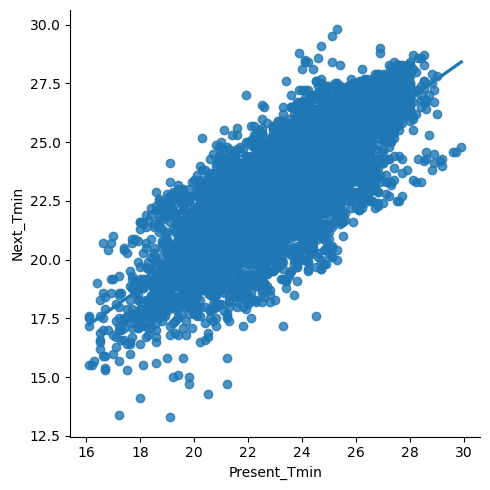

In [154]:
sns.lmplot(x='Present_Tmin', y='Next_Tmin', data=df, palette='colorblind')

In [ ]:
Here also, one can see that most data points are passing through the line of best fit.
so there is a strong and +Ve correlation.

# BAR PLOTS

<AxesSubplot:xlabel='Slope', ylabel='LDAPS_PPT1'>

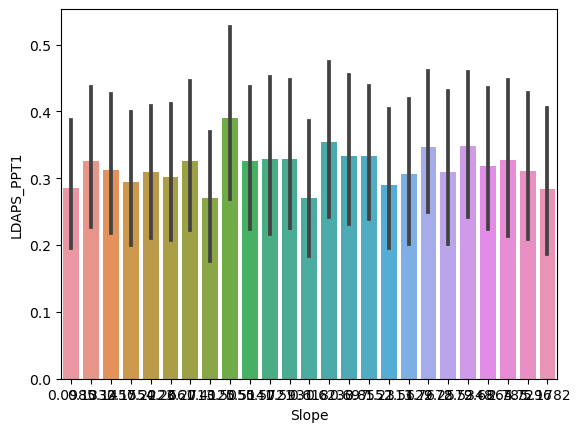

In [27]:
sns.barplot(y=df['LDAPS_PPT1'], x=df['Slope'])


In [ ]:
The highest PPT1 value is at 0.55  

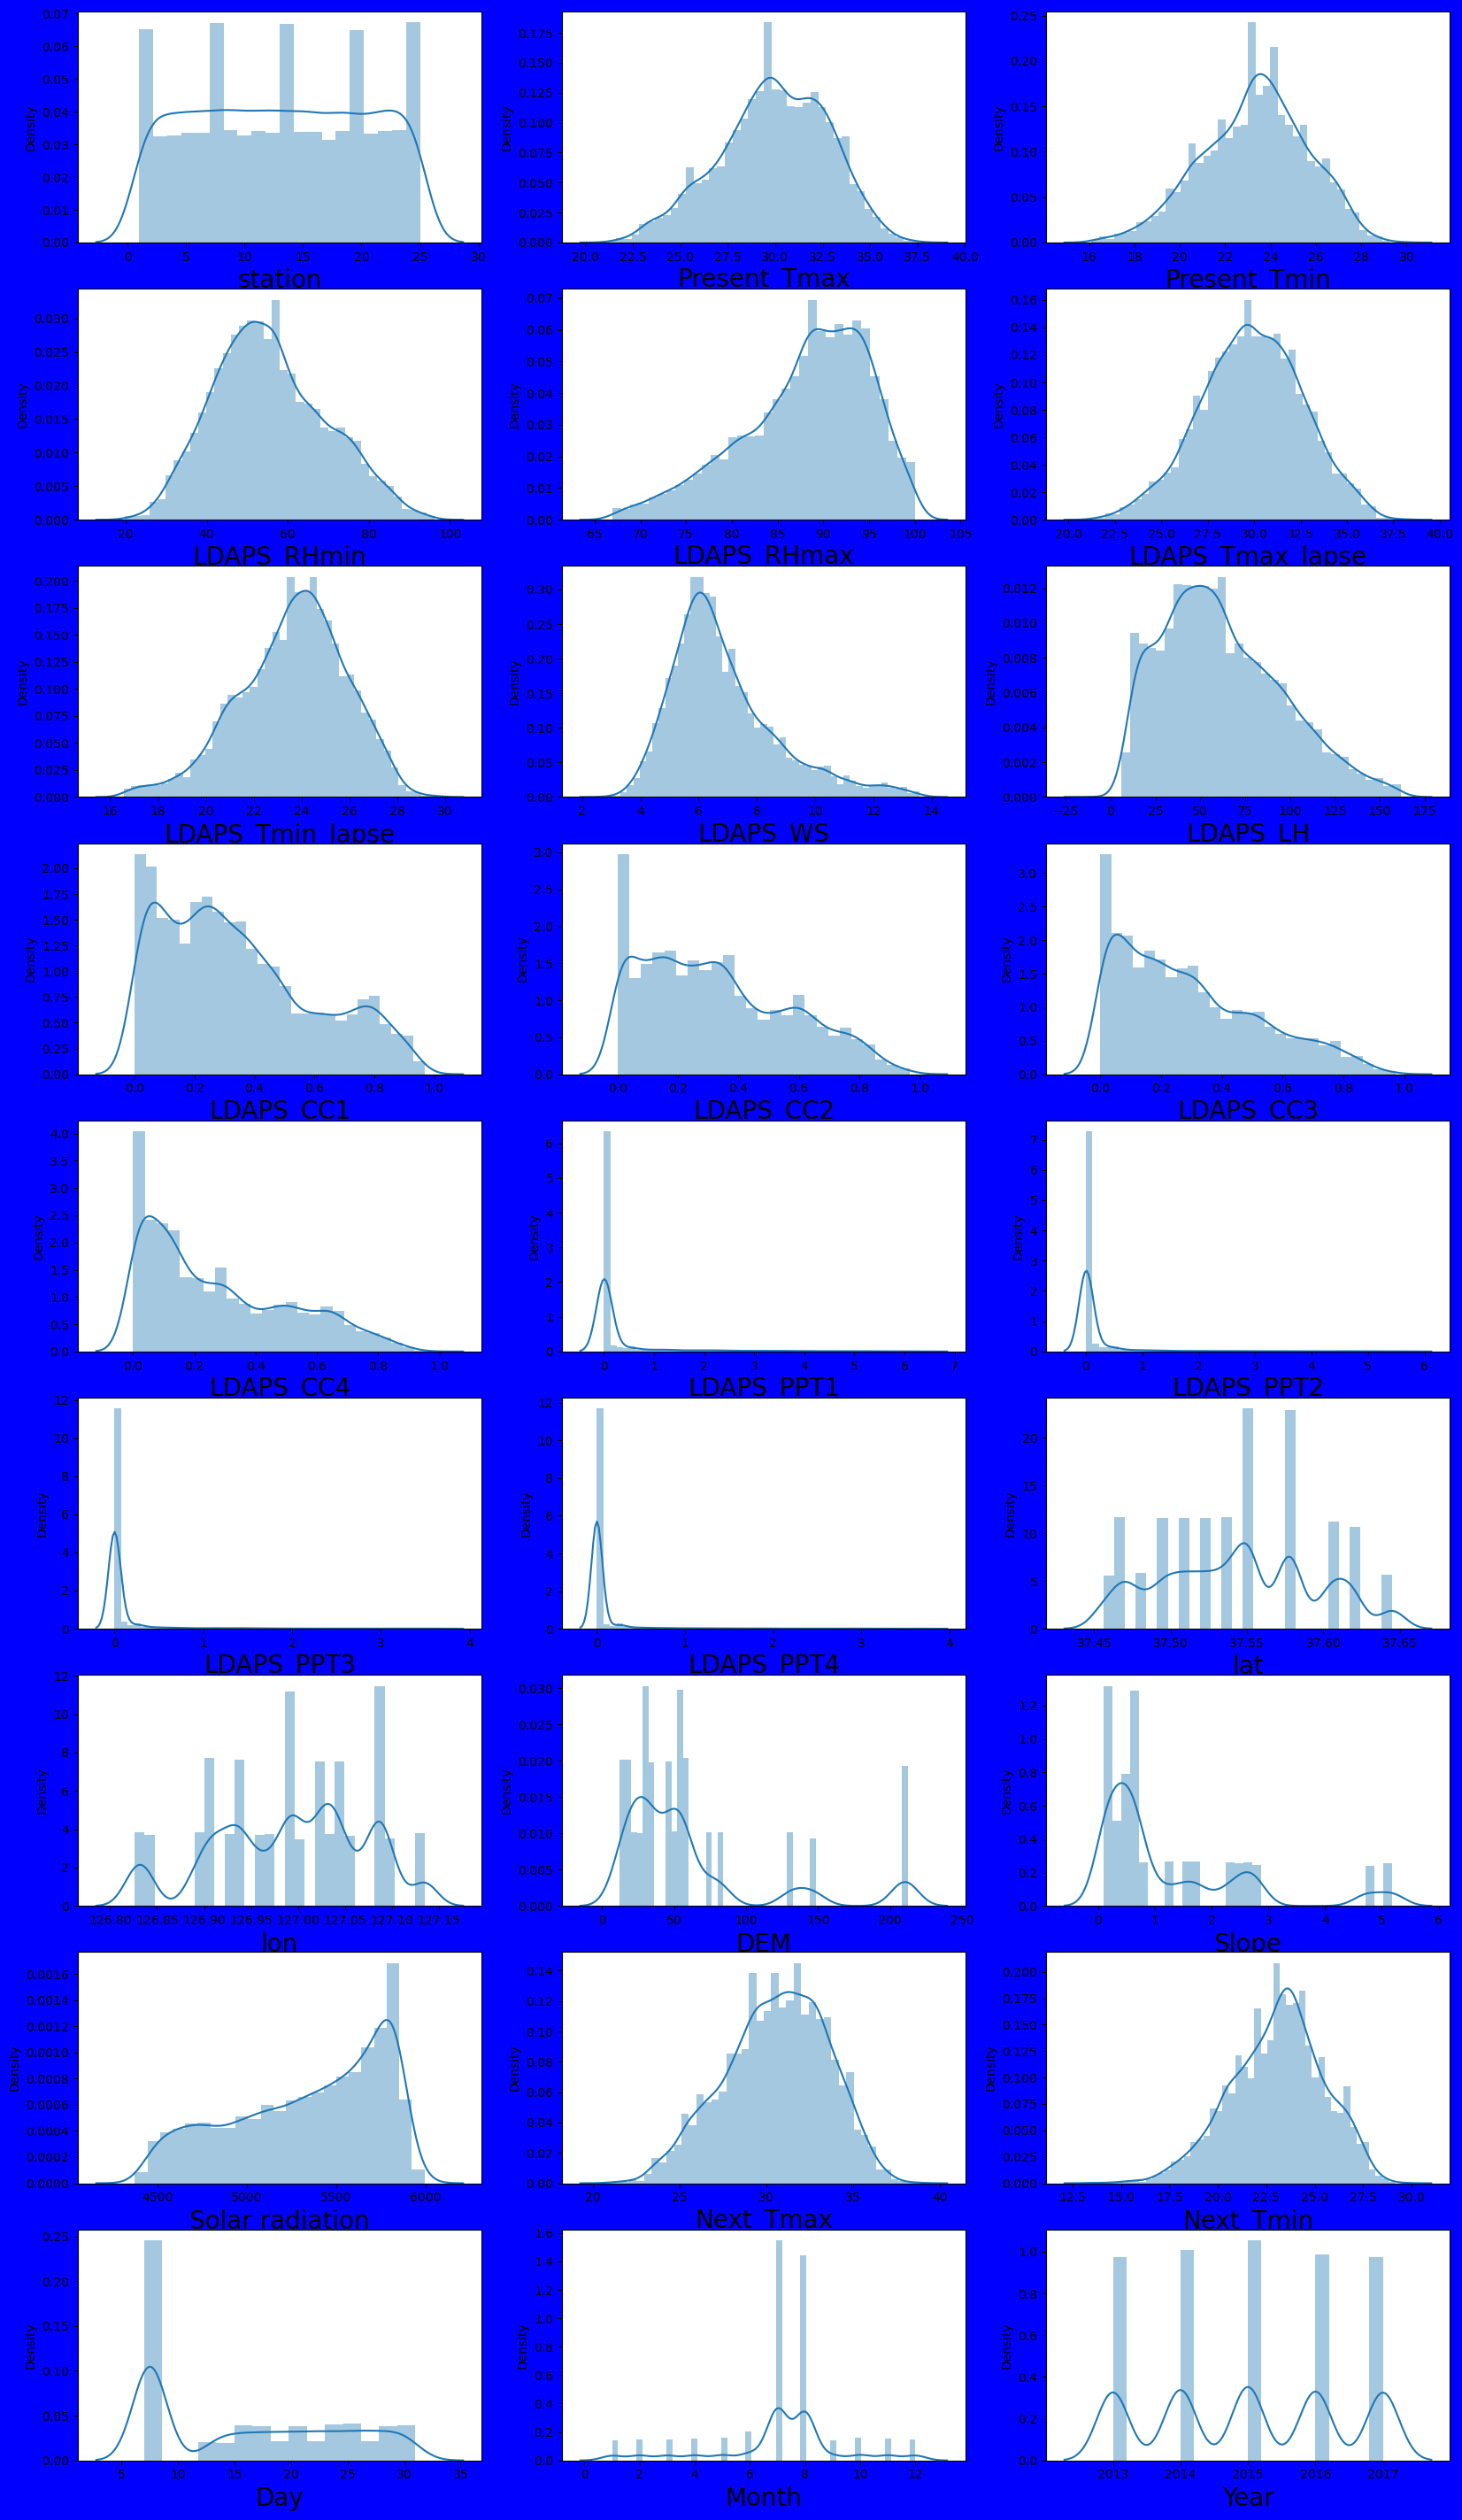

In [28]:
plt.figure(figsize=(20,40),facecolor='blue')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

There is skewness in the following variables:
    'LDAPS_RHmax','LDAPS_WS','LDAPS_CC1', 'LDAPS_CC2','LDAPS_CC3','LDAPS_CC4', 'LDAPS_PPT1',
    'LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM',
      'Slope','Solar radiation', 'Month

In [20]:
df.skew()

station             0.002840
Present_Tmax       -0.272517
Present_Tmin       -0.227931
LDAPS_RHmin         0.305504
LDAPS_RHmax        -0.688472
LDAPS_Tmax_lapse   -0.110579
LDAPS_Tmin_lapse   -0.385025
LDAPS_WS            1.087368
LDAPS_LH            0.568384
LDAPS_CC1           0.593567
LDAPS_CC2           0.500798
LDAPS_CC3           0.700042
LDAPS_CC4           0.710477
LDAPS_PPT1          3.731539
LDAPS_PPT2          4.844058
LDAPS_PPT3          5.479355
LDAPS_PPT4          5.927388
lat                 0.107956
lon                -0.275529
DEM                 1.763140
Slope               1.592980
Solar radiation    -0.504989
Next_Tmax          -0.273347
Next_Tmin          -0.240693
Day                 0.254940
Month              -0.683769
Year                0.010738
dtype: float64

In [21]:
skew=['LDAPS_RHmax','LDAPS_WS','LDAPS_CC1', 'LDAPS_CC2','LDAPS_CC3','LDAPS_CC4', 'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM',
      'Slope','Solar radiation', 'Month']


In [22]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [23]:
df.skew()

station             0.002840
Present_Tmax       -0.272517
Present_Tmin       -0.227931
LDAPS_RHmin         0.305504
LDAPS_RHmax        -0.098619
LDAPS_Tmax_lapse   -0.110579
LDAPS_Tmin_lapse   -0.385025
LDAPS_WS            0.006163
LDAPS_LH            0.568384
LDAPS_CC1           0.062611
LDAPS_CC2           0.047041
LDAPS_CC3           0.090248
LDAPS_CC4           0.137566
LDAPS_PPT1          1.546024
LDAPS_PPT2          1.736252
LDAPS_PPT3          1.902164
LDAPS_PPT4          2.155652
lat                 0.107956
lon                -0.275529
DEM                 0.038774
Slope               0.233737
Solar radiation    -0.166097
Next_Tmax          -0.273347
Next_Tmin          -0.240693
Day                 0.254940
Month               0.040305
Year                0.010738
dtype: float64

In [ ]:
Again, there is skewness in the PPT1 upto PPT4 columns. 

In [24]:
df['LDAPS_PPT1']=np.cbrt(df['LDAPS_PPT1'])
df['LDAPS_PPT2']=np.cbrt(df['LDAPS_PPT2'])
df['LDAPS_PPT3']=np.cbrt(df['LDAPS_PPT3'])
df['LDAPS_PPT4']=np.cbrt(df['LDAPS_PPT4'])

In [25]:
df.skew()

station             0.002840
Present_Tmax       -0.272517
Present_Tmin       -0.227931
LDAPS_RHmin         0.305504
LDAPS_RHmax        -0.098619
LDAPS_Tmax_lapse   -0.110579
LDAPS_Tmin_lapse   -0.385025
LDAPS_WS            0.006163
LDAPS_LH            0.568384
LDAPS_CC1           0.062611
LDAPS_CC2           0.047041
LDAPS_CC3           0.090248
LDAPS_CC4           0.137566
LDAPS_PPT1          1.316198
LDAPS_PPT2          1.481817
LDAPS_PPT3          1.568801
LDAPS_PPT4          1.817791
lat                 0.107956
lon                -0.275529
DEM                 0.038774
Slope               0.233737
Solar radiation    -0.166097
Next_Tmax          -0.273347
Next_Tmin          -0.240693
Day                 0.254940
Month               0.040305
Year                0.010738
dtype: float64

We have reduced the skewness in all columns except that in PPT1 to PPT4, there is some skewness still.

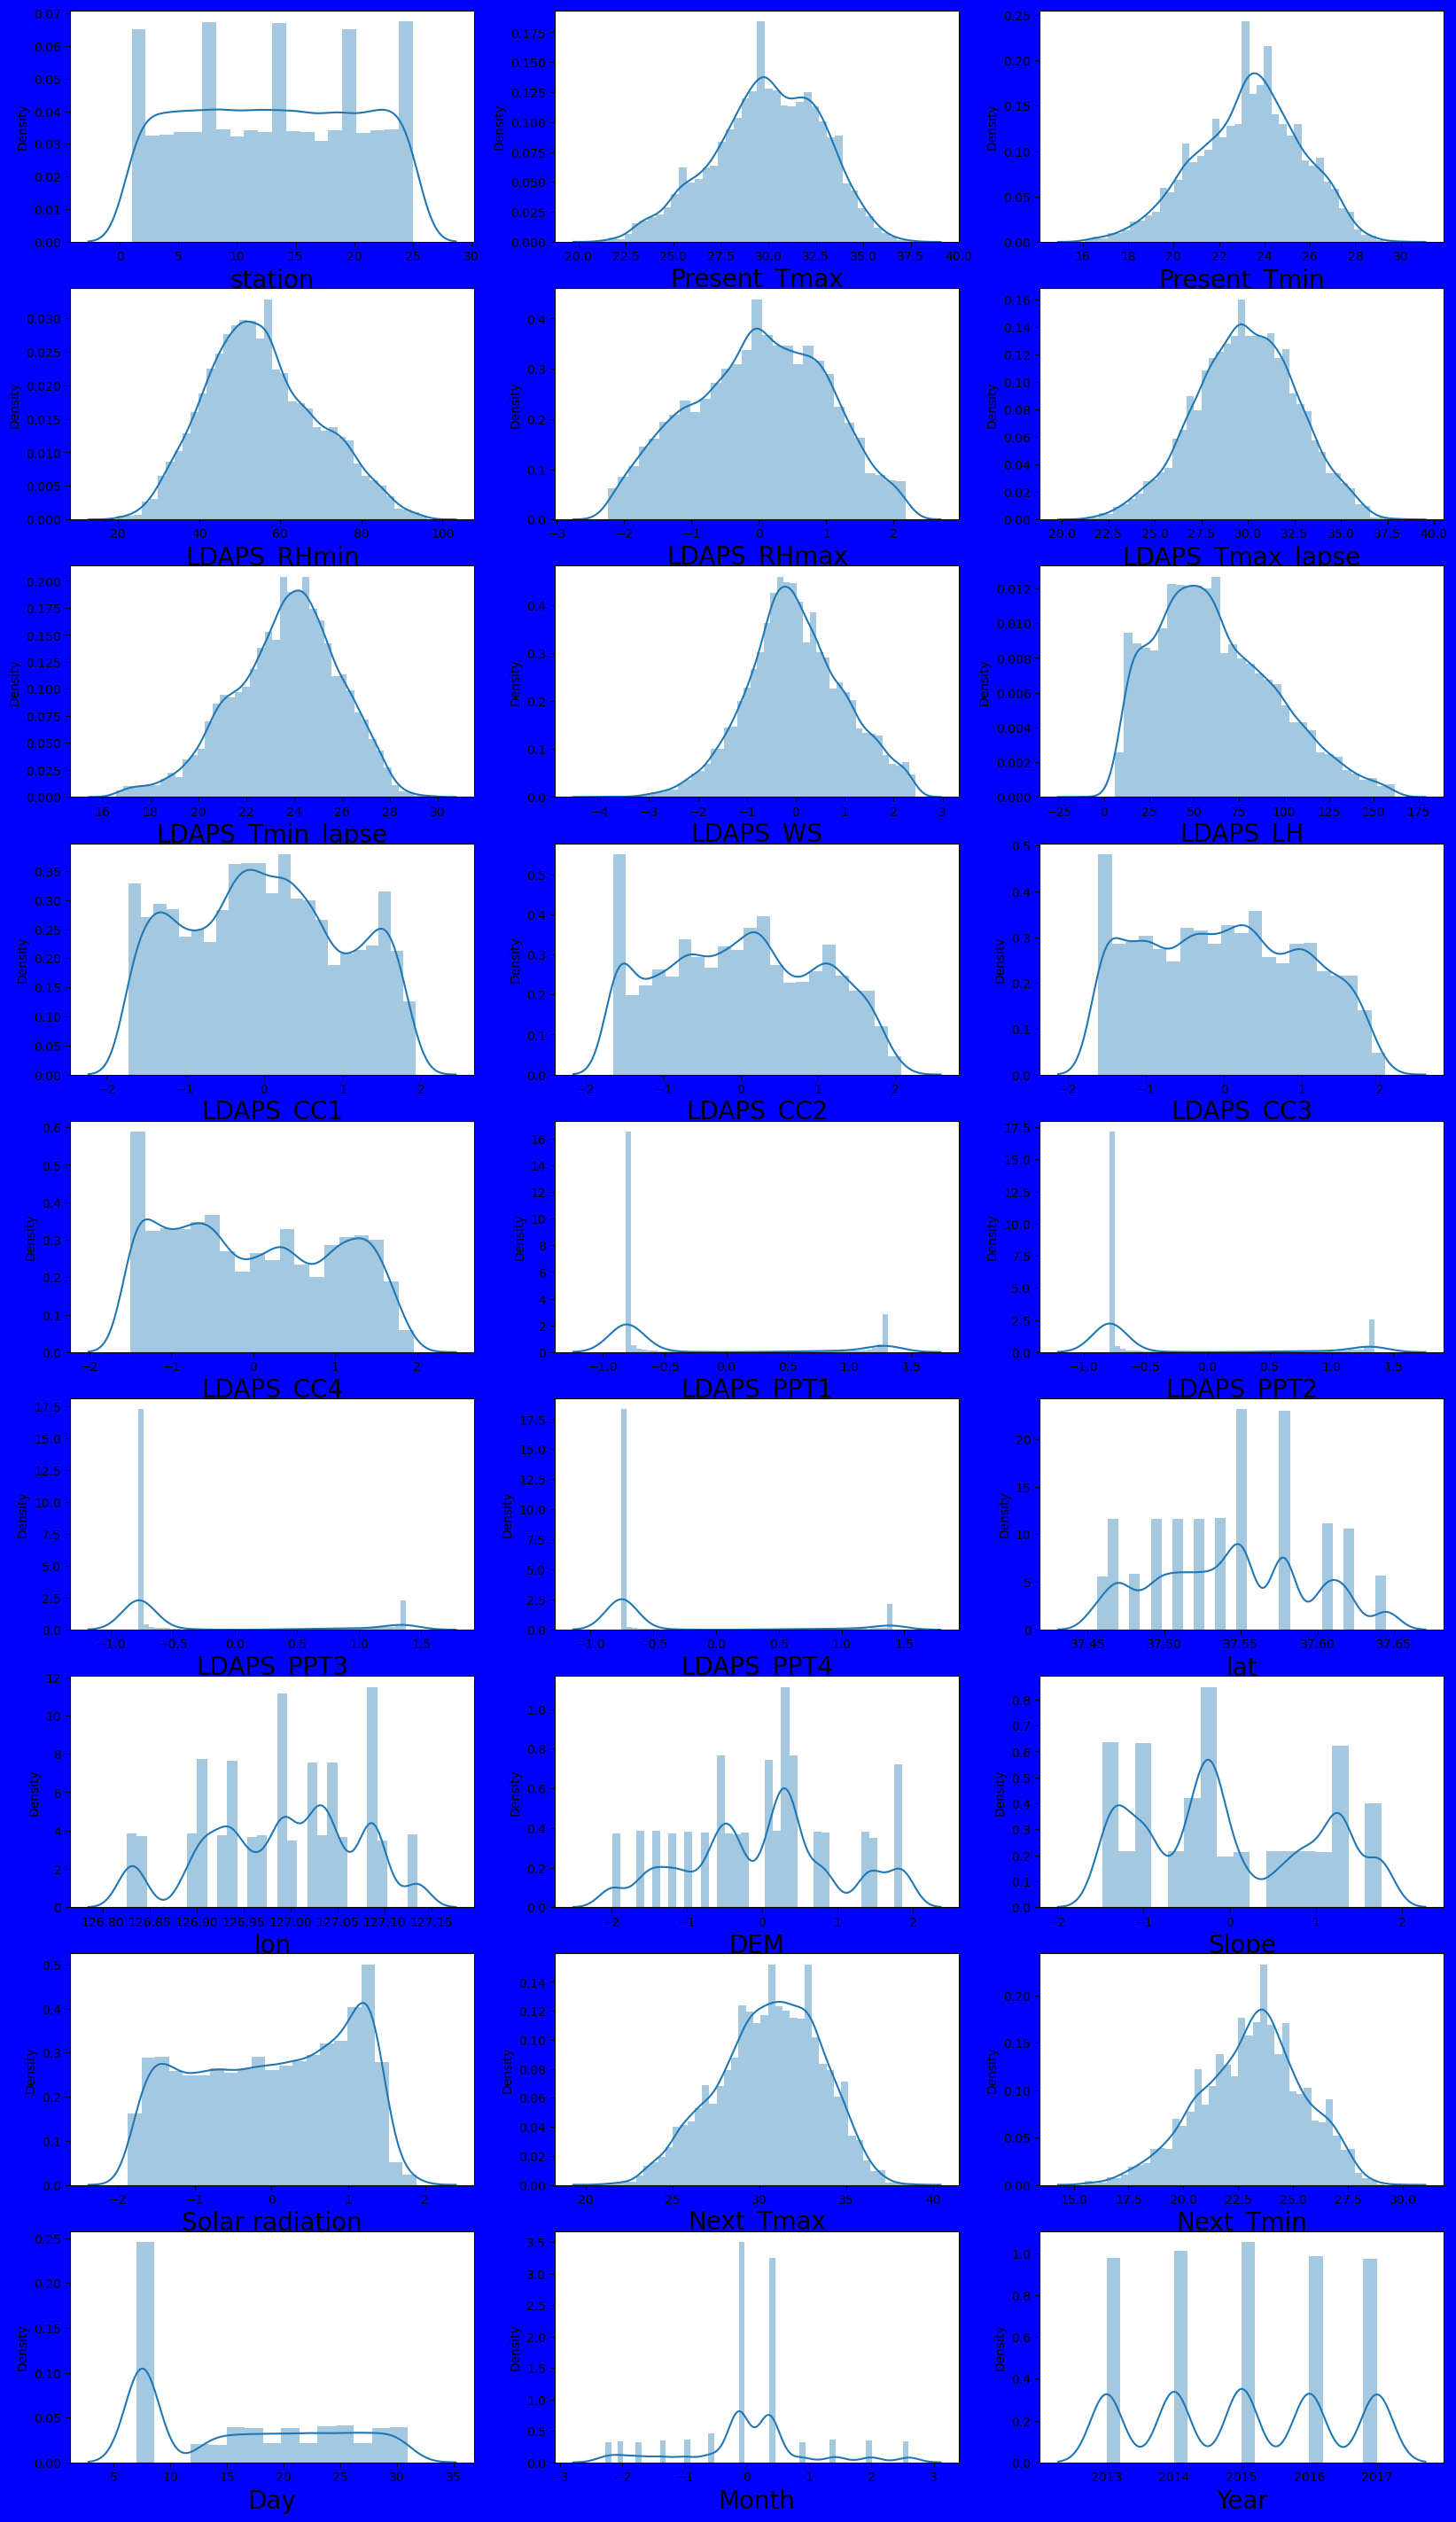

In [26]:
plt.figure(figsize=(20,40),facecolor='blue')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

The skewness has reduced for some rows and some rows still have little bit of skewness. We can go ahead with it.

# Checking for correlatin of variables

In [35]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110201      0.132716    -0.067644   
Present_Tmax      0.110201      1.000000      0.614395    -0.149083   
Present_Tmin      0.132716      0.614395      1.000000     0.153622   
LDAPS_RHmin      -0.067644     -0.149083      0.153622     1.000000   
LDAPS_RHmax      -0.177936     -0.314166     -0.049832     0.566537   
LDAPS_Tmax_lapse  0.066611      0.535406      0.436104    -0.552112   
LDAPS_Tmin_lapse  0.104067      0.610636      0.755003     0.135762   
LDAPS_WS          0.027686     -0.071807      0.035330     0.176112   
LDAPS_LH         -0.135154      0.127053     -0.007450    -0.039676   
LDAPS_CC1         0.012344     -0.279682      0.108414     0.582999   
LDAPS_CC2         0.007948     -0.156699      0.127887     0.706014   
LDAPS_CC3         0.007102     -0.057712      0.049034     0.639376   
LDAPS_CC4         0.011259     -0.047638      0.006088     0.460949   
LDAPS_PPT1       -0.003266     -0.177674      0.088788     0.409761   
LDAPS_PPT2       -0.003643     -0.084021      0.114410     0.503047   
LDAPS_PPT3       -0.005409     -0.010065      0.063676     0.412134   
LDAPS_PPT4       -0.000887     -0.006243     -0.026237     0.257450   
lat              -0.239847     -0.049950     -0.071011     0.088452   
lon              -0.121894      0.010636     -0.044785    -0.095040   
DEM              -0.324739     -0.132611     -0.239964     0.055735   
Slope            -0.144555     -0.094042     -0.159324     0.083456   
Solar radiation  -0.030623     -0.100382     -0.049467     0.230240   
Next_Tmax         0.106915      0.587102      0.448868    -0.424992   
Next_Tmin         0.128760      0.615886      0.786074     0.139054   
Day               0.005555     -0.127836     -0.072259    -0.072383   
Month             0.001510      0.040543     -0.010993    -0.068531   
Year              0.005481      0.101835      0.095206    -0.000415   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.177936          0.066611          0.104067  0.027686   
Present_Tmax        -0.314166          0.535406          0.610636 -0.071807   
Present_Tmin        -0.049832          0.436104          0.755003  0.035330   
LDAPS_RHmin          0.566537         -0.552112          0.135762  0.176112   
LDAPS_RHmax          1.000000         -0.401663         -0.155136  0.063439   
LDAPS_Tmax_lapse    -0.401663          1.000000          0.620604 -0.159274   
LDAPS_Tmin_lapse    -0.155136          0.620604          1.000000 -0.014787   
LDAPS_WS             0.063439         -0.159274         -0.014787  1.000000   
LDAPS_LH             0.258770          0.035373         -0.138488 -0.058011   
LDAPS_CC1            0.418143         -0.403567          0.078609  0.195178   
LDAPS_CC2            0.367502         -0.481919          0.120161  0.151646   
LDAPS_CC3            0.147237         -0.469952          0.043992  0.071493   
LDAPS_CC4            0.050732         -0.370462         -0.012235  0.094144   
LDAPS_PPT1           0.401933         -0.310077         -0.041888  0.206097   
LDAPS_PPT2           0.364422         -0.353354          0.027171  0.179519   
LDAPS_PPT3           0.215816         -0.286798         -0.012213  0.105651   
LDAPS_PPT4           0.111134         -0.212290         -0.080535  0.167826   
lat                  0.230413         -0.036970         -0.088850 -0.026080   
lon                  0.011097          0.102265         -0.030822 -0.075855   
DEM                  0.171759         -0.113466         -0.173868  0.114895   
Slope                0.207939         -0.108389         -0.158978  0.096514   
Solar radiation      0.157112         -0.030899          0.040376  0.159328   
Next_Tmax           -0.320951          0.806117          0.540175 -0.203498   
Next_Tmin           -0.103338          0.546807          0.868429  0.022248   
Day                 -0.010533         -0.142456        

In [ ]:
There are many columns to go over in detail indivdually. 
We can see various +ve and -ve correlations of each variables with target and with other variables.
Also we can note some variables are neutral to each other.

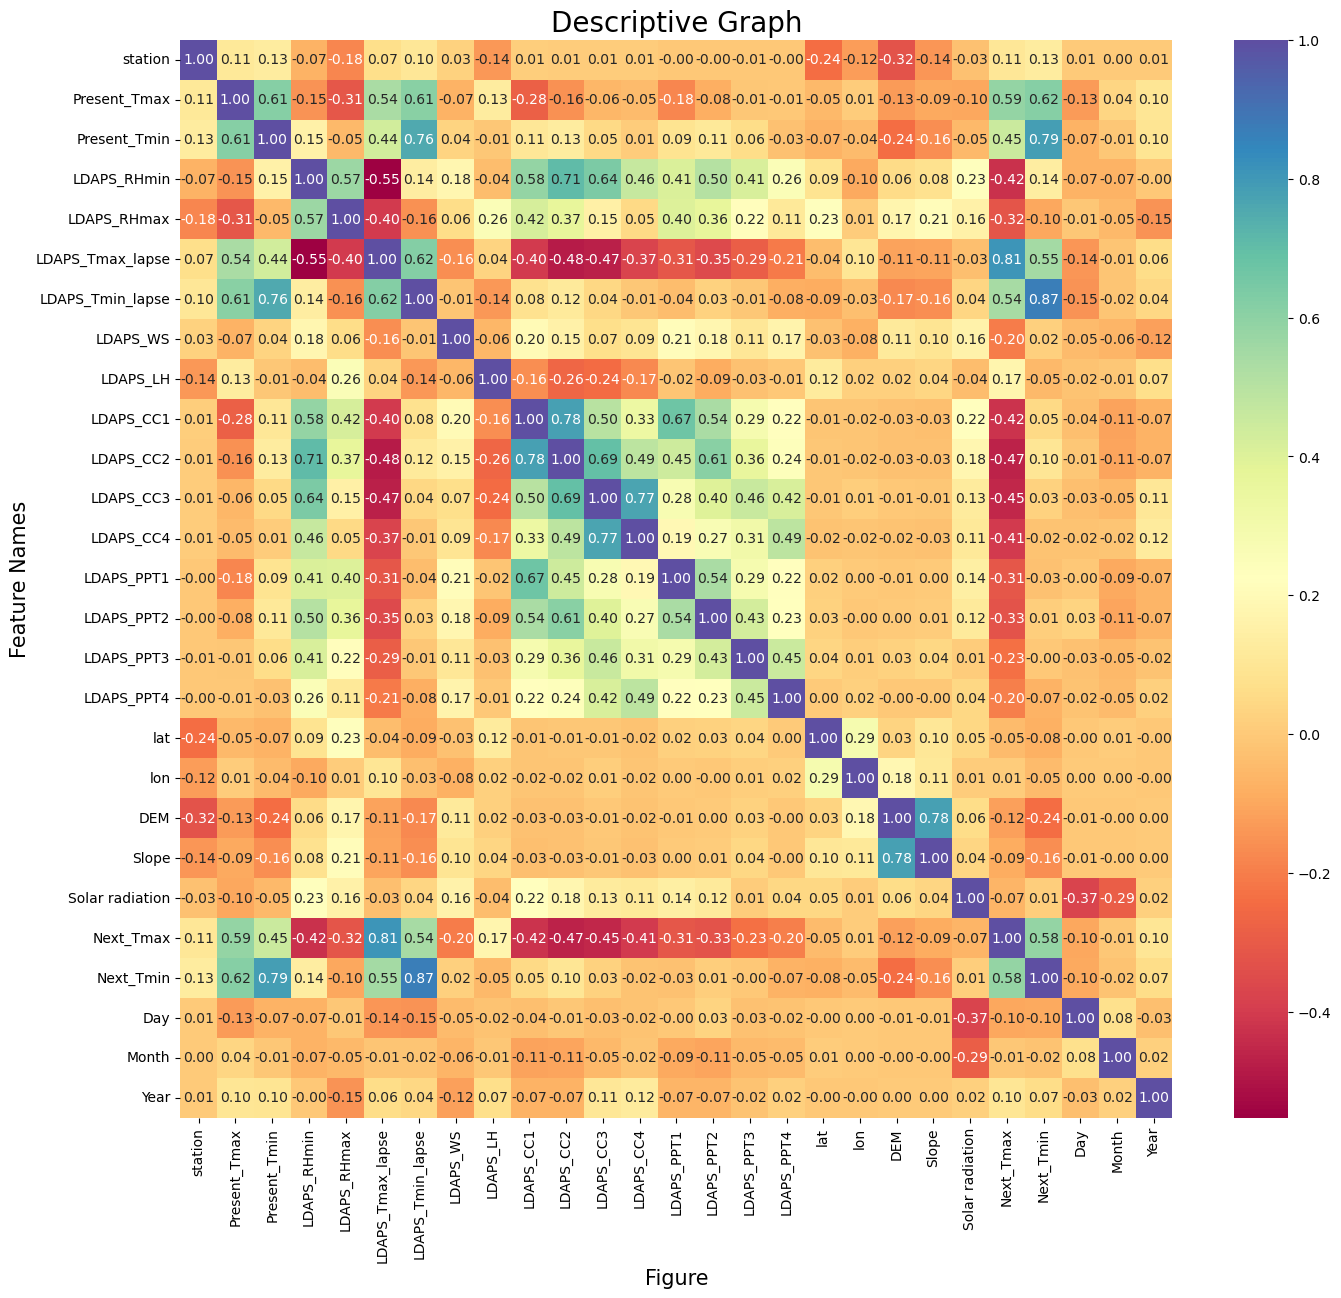

In [36]:
corr_hmap=df.corr()
plt.figure(figsize=(16, 14))
sns.heatmap(corr_hmap, annot=True, fmt='0.2f', cmap='Spectral')
plt.xlabel("Figure", fontsize=15)
plt.ylabel("Feature Names", fontsize=15)
plt.title("Descriptive Graph", fontsize=20)
plt.show()

In [ ]:
From the heatmap of df.corr(), one can find that LDAPS_PPT1 upto LDAPS_PPT4 and LDAPS_CC1 upto 
LDAPS_CC4 are positively corerlated with each other showing in the center of the graph.  
Again LDAPS_Tmax_Lapse and  LDAPS_Tmin_Lapse are also +vely correlated with each other.
Present_Tmax and Present_Tmin are also +vely correlated.
LDAPS_PPT1-LDAPS_PPT4 and LDAPS_CC1-LDAPS_CC4 are negatively correlated with Next_Tmax and with 
LDAPS_Tmax_Lapse also.  

I tried this graph, which I learnt. It is easy to understand through chart easily, as to which is +Ve and -vely related to the 
targets.

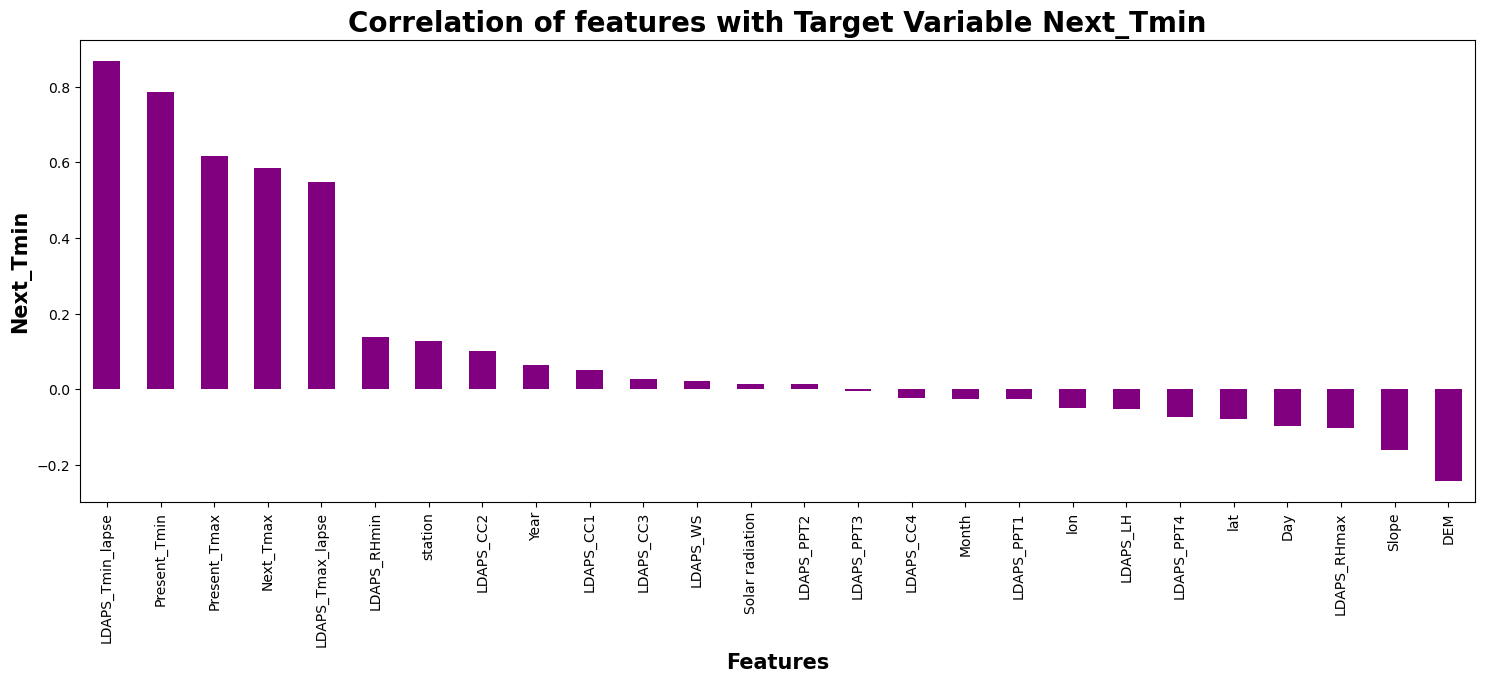

In [37]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmin'].drop(['Next_Tmin']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmin',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmin',fontsize = 20,fontweight='bold')
plt.show()

In [ ]:
The graph shows +ve relationship for which the bar is pointing upwards and -ve relationship with 
bars pointing downward in comparison to target Next_Tmin. This target has most of them positively 
related.

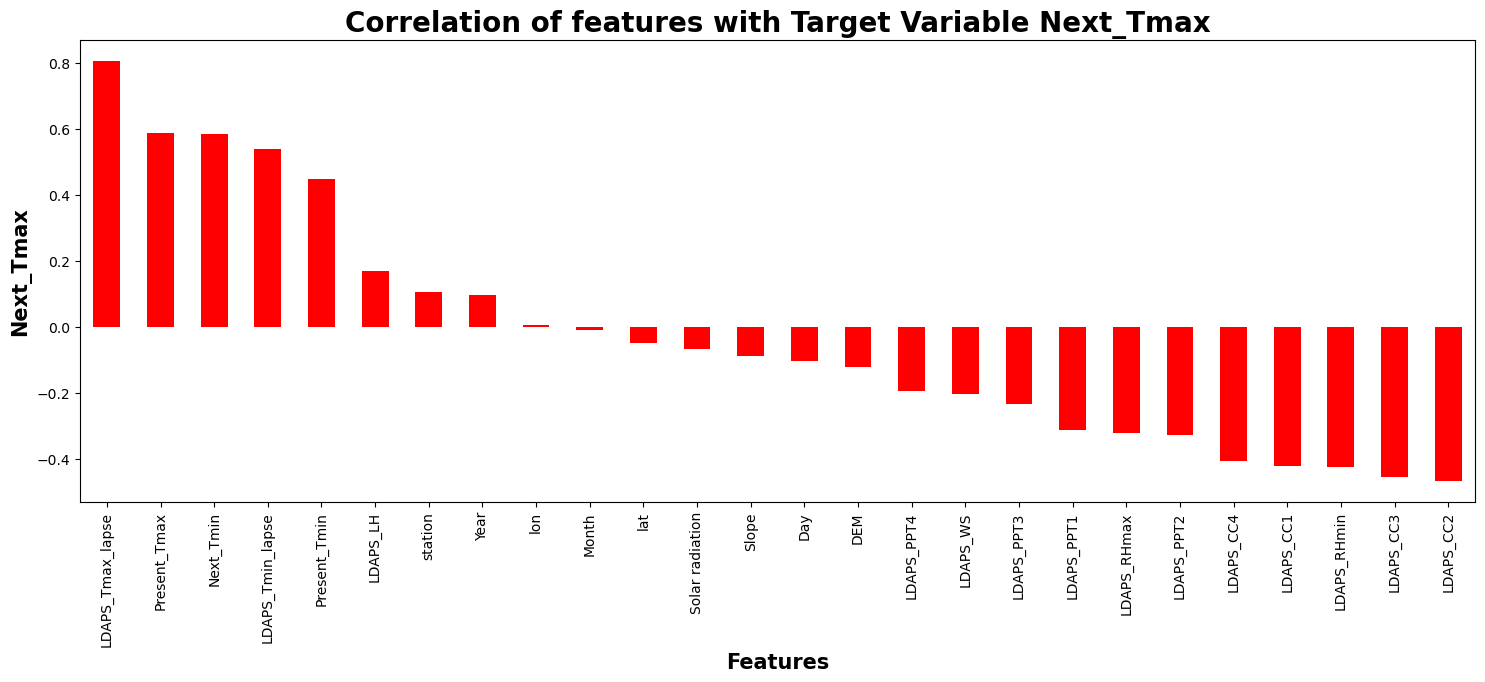

In [82]:
plt.figure(figsize = (18,6))
df.corr()['Next_Tmax'].drop(['Next_Tmax']).sort_values(ascending=False).plot(kind='bar',color = 'red')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Next_Tmax',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Next_Tmax',fontsize = 20,fontweight='bold')
plt.show()

In [ ]:
The graph shows +ve relationship for which the bar is pointing upwards and -ve relationship with 
bars pointing downward in comparison to target Next_Tmax. We can see that as compared to Next_Tmin, Next_Tmax target has 
many negatively related variables showing as temperature increases, most of these _Vely related variables decrease.

# Splitting x and y for VIF and other techniques


# Considering Next_Tmax as the Target Variable, we can try out the predictions first

# Applying LabelEncoder to convert string columns into float datatype and scaling the data¶¶

In [27]:
x=df.drop(['Next_Tmax'], axis=1)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     0.347675   
2013-06-30      2.0          31.9          21.6    52.263397     0.259845   
2013-06-30      3.0          31.6          23.3    48.690479    -0.726605   
2013-06-30      4.0          32.0          23.4    58.239788     1.383262   
2013-06-30      5.0          31.4          21.9    56.174095     0.184138   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    -1.377759   
2017-08-30     22.0          22.5          17.4    30.094858    -0.762955   
2017-08-30     23.0          23.3          17.1    26.741310    -1.316103   
2017-08-30     24.0          23.3          17.7    24.040634    -1.472179   
2017-08-30     25.0          23.2          17.4    22.933014    -1.477066   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  0.170159   69.451805   
2013-06-30         29.850689         24.035009 -0.584293   51.937448   
2013-06-30         30.091292         24.565633 -0.260632   20.573050   
2013-06-30         29.704629         23.326177 -0.616573   65.727144   
2013-06-30         29.113934         23.486480 -0.551396  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  0.040989    9.614074   
2017-08-30         26.704905         17.814038 -0.526406   82.146707   
2017-08-30         26.352081         18.775678 -0.253312   72.058294   
2017-08-30         27.010193         18.733519  0.003632   47.241457   
2017-08-30         27.939516         18.522965  0.431428    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT4      lat      lon       DEM     Slope  \
Date                   ...                                                     
2013-06-30  -0.315975  ...   -0.753784  37.6046  126.991  1.853653  1.329280   
2013-06-30  -0.357321  ...   -0.753784  37.6046  127.032  0.069156 -0.374691   
2013-06-30  -0.438119  ...   -0.753784  37.5776  127.058 -0.353916 -0.943512   
2013-06-30  -0.402726  ...   -0.753784  37.6450  127.022  0.098214  1.250685   
2013-06-30  -0.746258  ...   -0.753784  37.5507  127.135 -0.279309 -0.391211   
...               ...  ...         ...      ...      ...       ...       ...   
2017-08-30  -1.347593  ...   -0.753784  37.5507  127.040 -0.713335 -0.268103   
2017-08-30  -1.258261  ...   -0.753784  37.5102  127.086 -0.999931 -1.353509   
2017-08-30  -1.503561  ...   -0.753784  37.5372  126.891 -1.576846 -1.278305   
2017-08-30  -1.463081  ...   -0.753784  37.5237  126.909 -1.397799 -1.068560   
2017-08-30  -1.374041  ...   -0.753784  37.5237  126.970 -1.188550 -0.929251   

            Solar radiation  Next_Tmin  Day     Month  Year  
Date                                                         
2013-06-30         1.889093       21.2   30 -0.583762  2013  
2013-06-30         1.434104       22.5   30 -0.583762  2013  
2013-06-30         1.413760       23.9   30 -0.583762  2013  
2013-06-30         1.390559       24.3   30 -0.583762  2013  
2013-06-30         1.399655       22.5   30 -0.583762  2013  
...                     ...        ...  ...       ...   ...  
2017-08-30        -1.769679       17.7   30  0.357557  2017  
2017-08-30        -1.787652       17.1   30  0.357557  2017  
2017-08-30        -1.785753       18.1   30  0.357557  2017  
2017-08-30        -1.791955       18.8   30  0.357557  2017  
2017-08-30        -1.775616       17.4   30  0.357557  2017  

[6895 rows x 26 columns]

In [28]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler() #scaling applied and we can see the uniformity in the values
x=pd.DataFrame(st.fit_transform(x))
x

0         1         2         3         4         5         6   \
0    -1.671493 -0.433292 -0.827514  0.191197  0.347675 -0.661040 -0.290121   
1    -1.532597  0.687718 -0.740859 -0.242311  0.259845 -0.011725  0.173694   
2    -1.393700  0.582623 -0.004298 -0.500791 -0.726605  0.076212  0.413085   
3    -1.254804  0.722749  0.039029  0.190047  1.383262 -0.065107 -0.146095   
4    -1.115907  0.512560 -0.610878  0.040606  0.184138 -0.280997 -0.073775   
...        ...       ...       ...       ...       ...       ...       ...   
6890  1.106439 -2.395060 -2.387290 -2.237160 -1.377759 -0.756579 -2.412293   
6891  1.245336 -2.605249 -2.560598 -1.846077 -0.762955 -1.161460 -2.632894   
6892  1.384232 -2.324997 -2.690579 -2.088687 -1.316103 -1.290412 -2.199050   
6893  1.523129 -2.324997 -2.430617 -2.284065 -1.472179 -1.049882 -2.218071   
6894  1.662026 -2.360028 -2.560598 -2.364195 -1.477066 -0.710229 -2.313062   

            7         8         9   ...        16        17        18  \
0     0.170159  0.224917 -0.315975  ... -0.459588  1.214301  0.002256   
1    -0.584293 -0.302008 -0.357321  ... -0.459588  1.214301  0.516911   
2    -0.260632 -1.245616 -0.438119  ... -0.459588  0.673904  0.843277   
3    -0.616573  0.112859 -0.402726  ... -0.459588  2.022893  0.391385   
4    -0.551396  1.383614 -0.746258  ... -0.459588  0.135510  1.809825   
...        ...       ...       ...  ...       ...       ...       ...   
6890  0.040989 -1.575320 -1.347593  ... -0.459588  0.135510  0.617331   
6891 -0.526406  0.606847 -1.258261  ... -0.459588 -0.675084  1.194749   
6892 -0.253312  0.303334 -1.503561  ... -0.459588 -0.134688 -1.253001   
6893  0.003632 -0.443288 -1.463081  ... -0.459588 -0.404886 -1.027055   
6894  0.431428 -1.591086 -1.374041  ... -0.459588 -0.404886 -0.261348   

            19        20        21        22        23        24        25  
0     1.853653  1.329280  1.889093 -0.799802  1.662628 -0.583762 -1.423577  
1     0.069156 -0.374691  1.434104 -0.247736  1.662628 -0.583762 -1.423577  
2    -0.353916 -0.943512  1.413760  0.346797  1.662628 -0.583762 -1.423577  
3     0.098214  1.250685  1.390559  0.516664  1.662628 -0.583762 -1.423577  
4    -0.279309 -0.391211  1.399655 -0.247736  1.662628 -0.583762 -1.423577  
...        ...       ...       ...       ...       ...       ...       ...  
6890 -0.713335 -0.268103 -1.769679 -2.286135  1.662628  0.357557  1.433730  
6891 -0.999931 -1.353509 -1.787652 -2.540934  1.662628  0.357557  1.433730  
6892 -1.576846 -1.278305 -1.785753 -2.116268  1.662628  0.357557  1.433730  
6893 -1.397799 -1.068560 -1.791955 -1.819001  1.662628  0.357557  1.433730  
6894 -1.188550 -0.929251 -1.775616 -2.413534  1.662628  0.357557  1.433730  

[6895 rows x 26 columns]

In [ ]:
Since there were no categorical columns, I didnt find the need to group data accordingly but for encoding purposes, am trying
to check if there are any categorical data columns.

In [29]:
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]==object:
        categorical_col.append(i)
print("Categorical Columns:", categorical_col)

Categorical Columns: []


Therea are nill columns. So am going ahead with skipping the LabelEncoder or other encoder technique

In [102]:
numerical_col=[]    
for i in df.dtypes.index:
    if df.dtypes[i]!="object":
        numerical_col.append(i)
print("Numerical columns:", numerical_col)

Numerical columns: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Day', 'Month', 'Year']


Instead of using seperate lists for numerica and object data types, I came across this command which is easy and small code.

In [42]:
df.columns.to_series().groupby(df.dtypes).groups #This method also gives information on different types of data 

{int64: ['Day', 'Year'], float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Month']}

# Applying Variation Inflation Factor for multicollinearity issues

As Next_Tmin was considered target label, I had not filled in the null values from before, So filling them now, otherwise VIF
encountered error due to missing values.

In [31]:
df['Next_Tmin']=df['Next_Tmin'].fillna(df['Next_Tmin'].mean())
df['Next_Tmax']=df['Next_Tmax'].fillna(df['Next_Tmax'].mean())

In [32]:
x=df.drop(['Next_Tmax'], axis=1)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
Date                                                                        
2013-06-30      1.0          28.7          21.4    58.255688     0.347675   
2013-06-30      2.0          31.9          21.6    52.263397     0.259845   
2013-06-30      3.0          31.6          23.3    48.690479    -0.726605   
2013-06-30      4.0          32.0          23.4    58.239788     1.383262   
2013-06-30      5.0          31.4          21.9    56.174095     0.184138   
...             ...           ...           ...          ...          ...   
2017-08-30     21.0          23.1          17.8    24.688997    -1.377759   
2017-08-30     22.0          22.5          17.4    30.094858    -0.762955   
2017-08-30     23.0          23.3          17.1    26.741310    -1.316103   
2017-08-30     24.0          23.3          17.7    24.040634    -1.472179   
2017-08-30     25.0          23.2          17.4    22.933014    -1.477066   

            LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
Date                                                                   
2013-06-30         28.074101         23.006936  0.170159   69.451805   
2013-06-30         29.850689         24.035009 -0.584293   51.937448   
2013-06-30         30.091292         24.565633 -0.260632   20.573050   
2013-06-30         29.704629         23.326177 -0.616573   65.727144   
2013-06-30         29.113934         23.486480 -0.551396  107.965535   
...                      ...               ...       ...         ...   
2017-08-30         27.812697         18.303014  0.040989    9.614074   
2017-08-30         26.704905         17.814038 -0.526406   82.146707   
2017-08-30         26.352081         18.775678 -0.253312   72.058294   
2017-08-30         27.010193         18.733519  0.003632   47.241457   
2017-08-30         27.939516         18.522965  0.431428    9.090034   

            LDAPS_CC1  ...  LDAPS_PPT4      lat      lon       DEM     Slope  \
Date                   ...                                                     
2013-06-30  -0.315975  ...   -0.753784  37.6046  126.991  1.853653  1.329280   
2013-06-30  -0.357321  ...   -0.753784  37.6046  127.032  0.069156 -0.374691   
2013-06-30  -0.438119  ...   -0.753784  37.5776  127.058 -0.353916 -0.943512   
2013-06-30  -0.402726  ...   -0.753784  37.6450  127.022  0.098214  1.250685   
2013-06-30  -0.746258  ...   -0.753784  37.5507  127.135 -0.279309 -0.391211   
...               ...  ...         ...      ...      ...       ...       ...   
2017-08-30  -1.347593  ...   -0.753784  37.5507  127.040 -0.713335 -0.268103   
2017-08-30  -1.258261  ...   -0.753784  37.5102  127.086 -0.999931 -1.353509   
2017-08-30  -1.503561  ...   -0.753784  37.5372  126.891 -1.576846 -1.278305   
2017-08-30  -1.463081  ...   -0.753784  37.5237  126.909 -1.397799 -1.068560   
2017-08-30  -1.374041  ...   -0.753784  37.5237  126.970 -1.188550 -0.929251   

            Solar radiation  Next_Tmin  Day     Month  Year  
Date                                                         
2013-06-30         1.889093       21.2   30 -0.583762  2013  
2013-06-30         1.434104       22.5   30 -0.583762  2013  
2013-06-30         1.413760       23.9   30 -0.583762  2013  
2013-06-30         1.390559       24.3   30 -0.583762  2013  
2013-06-30         1.399655       22.5   30 -0.583762  2013  
...                     ...        ...  ...       ...   ...  
2017-08-30        -1.769679       17.7   30  0.357557  2017  
2017-08-30        -1.787652       17.1   30  0.357557  2017  
2017-08-30        -1.785753       18.1   30  0.357557  2017  
2017-08-30        -1.791955       18.8   30  0.357557  2017  
2017-08-30        -1.775616       17.4   30  0.357557  2017  

[6895 rows x 26 columns]

In [33]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler() #scaling applied and we can see the uniformity in the values
x=pd.DataFrame(st.fit_transform(x))
x

0         1         2         3         4         5         6   \
0    -1.671493 -0.433292 -0.827514  0.191197  0.347675 -0.661040 -0.290121   
1    -1.532597  0.687718 -0.740859 -0.242311  0.259845 -0.011725  0.173694   
2    -1.393700  0.582623 -0.004298 -0.500791 -0.726605  0.076212  0.413085   
3    -1.254804  0.722749  0.039029  0.190047  1.383262 -0.065107 -0.146095   
4    -1.115907  0.512560 -0.610878  0.040606  0.184138 -0.280997 -0.073775   
...        ...       ...       ...       ...       ...       ...       ...   
6890  1.106439 -2.395060 -2.387290 -2.237160 -1.377759 -0.756579 -2.412293   
6891  1.245336 -2.605249 -2.560598 -1.846077 -0.762955 -1.161460 -2.632894   
6892  1.384232 -2.324997 -2.690579 -2.088687 -1.316103 -1.290412 -2.199050   
6893  1.523129 -2.324997 -2.430617 -2.284065 -1.472179 -1.049882 -2.218071   
6894  1.662026 -2.360028 -2.560598 -2.364195 -1.477066 -0.710229 -2.313062   

            7         8         9   ...        16        17        18  \
0     0.170159  0.224917 -0.315975  ... -0.459588  1.214301  0.002256   
1    -0.584293 -0.302008 -0.357321  ... -0.459588  1.214301  0.516911   
2    -0.260632 -1.245616 -0.438119  ... -0.459588  0.673904  0.843277   
3    -0.616573  0.112859 -0.402726  ... -0.459588  2.022893  0.391385   
4    -0.551396  1.383614 -0.746258  ... -0.459588  0.135510  1.809825   
...        ...       ...       ...  ...       ...       ...       ...   
6890  0.040989 -1.575320 -1.347593  ... -0.459588  0.135510  0.617331   
6891 -0.526406  0.606847 -1.258261  ... -0.459588 -0.675084  1.194749   
6892 -0.253312  0.303334 -1.503561  ... -0.459588 -0.134688 -1.253001   
6893  0.003632 -0.443288 -1.463081  ... -0.459588 -0.404886 -1.027055   
6894  0.431428 -1.591086 -1.374041  ... -0.459588 -0.404886 -0.261348   

            19        20        21        22        23        24        25  
0     1.853653  1.329280  1.889093 -0.799802  1.662628 -0.583762 -1.423577  
1     0.069156 -0.374691  1.434104 -0.247736  1.662628 -0.583762 -1.423577  
2    -0.353916 -0.943512  1.413760  0.346797  1.662628 -0.583762 -1.423577  
3     0.098214  1.250685  1.390559  0.516664  1.662628 -0.583762 -1.423577  
4    -0.279309 -0.391211  1.399655 -0.247736  1.662628 -0.583762 -1.423577  
...        ...       ...       ...       ...       ...       ...       ...  
6890 -0.713335 -0.268103 -1.769679 -2.286135  1.662628  0.357557  1.433730  
6891 -0.999931 -1.353509 -1.787652 -2.540934  1.662628  0.357557  1.433730  
6892 -1.576846 -1.278305 -1.785753 -2.116268  1.662628  0.357557  1.433730  
6893 -1.397799 -1.068560 -1.791955 -1.819001  1.662628  0.357557  1.433730  
6894 -1.188550 -0.929251 -1.775616 -2.413534  1.662628  0.357557  1.433730  

[6895 rows x 26 columns]

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
VIF["features"]=x.columns
VIF

VIF values  features
0     1.289856         0
1     2.824387         1
2     3.349236         2
3     6.058344         3
4     2.548456         4
5     6.956679         5
6     8.507841         6
7     1.213781         7
8     1.516137         8
9     4.464184         9
10    5.245664        10
11    4.601673        11
12    2.818927        12
13    2.301490        13
14    2.075363        14
15    1.665511        15
16    1.643421        16
17    1.290378        17
18    1.222780        18
19    3.352089        19
20    2.864110        20
21    1.448533        21
22    5.365494        22
23    1.245772        23
24    1.121741        24
25    1.137657        25

Clearly VIF is not showing any values greater than 10. So we need not drop any of the columns.

# Applying Principal Component Analysis as there are many columns, to minimize the columns into most contributing columns 

In [35]:
from sklearn.decomposition import PCA
pca=PCA()
x_pca=pca.fit_transform(x)
x=x_pca
x

array([[-0.03477971,  2.61111845, -2.29580713, ..., -0.16603551,
         0.1614584 ,  0.29622864],
       [-0.86522571,  0.90410458, -0.90891137, ..., -0.24071554,
         0.1371771 ,  0.21351152],
       [-1.17473353, -0.18271419, -0.03423541, ...,  0.06127616,
         0.18207865,  0.21740021],
       ...,
       [-2.61905374,  4.51647375,  4.2527789 , ...,  0.404309  ,
        -0.39378477,  0.63924085],
       [-2.7497989 ,  4.21208989,  4.24279329, ...,  0.54809405,
        -0.29781717,  0.48531007],
       [-2.69802344,  4.5210939 ,  4.25144518, ...,  0.06402921,
        -0.31269218,  0.27826358]])

In [ ]:
This plot I tried executing, which gave me an understanding of how to choose the component number. The variance after 15 is
very less, so i choose the number of components to be 15. 

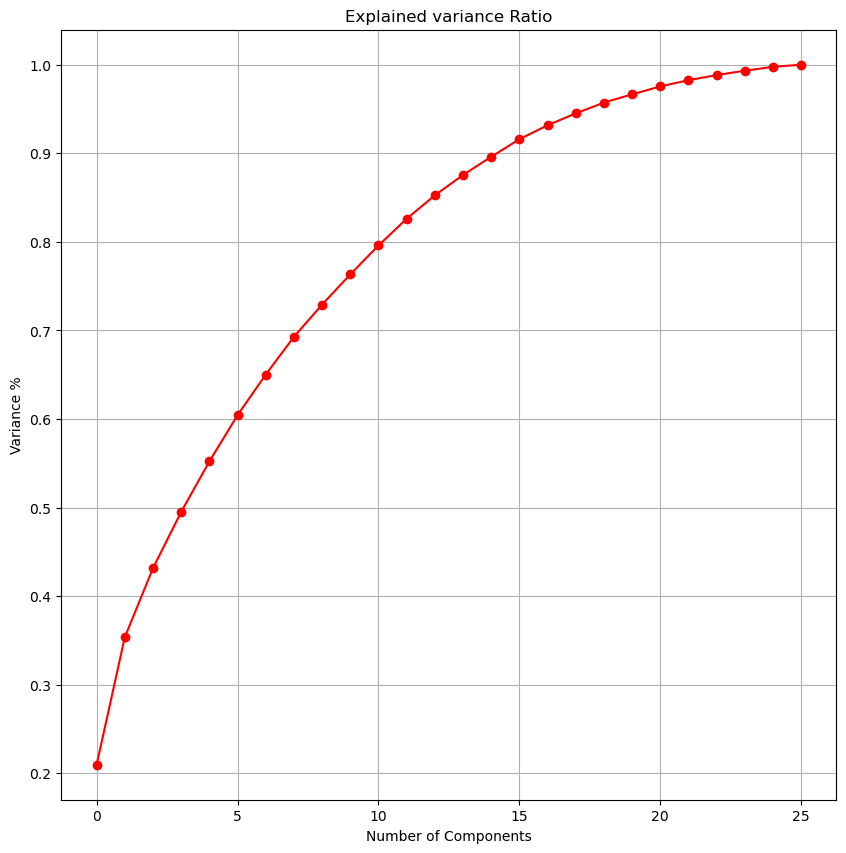

In [36]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [37]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(x)

In [38]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))
x=principle_x
x

0         1         2         3         4         5         6   \
0    -0.034780  2.611118 -2.295807  0.203647  0.453751 -0.512726 -0.620453   
1    -0.865226  0.904105 -0.908911  0.625658 -0.307500  0.588690 -1.451217   
2    -1.174734 -0.182714 -0.034235  0.431349  0.164946  0.179331 -1.999778   
3    -0.493787  0.770898 -2.343050  0.579779 -0.869898  0.412661 -1.031957   
4    -0.870080  1.025918 -0.859504  0.528880 -0.681704  1.138710 -0.766088   
...        ...       ...       ...       ...       ...       ...       ...   
6890 -2.641127  4.854329  3.196639  0.052684 -0.424837 -0.710946 -0.942609   
6891 -2.411030  5.180792  3.468419  0.684427 -1.308237  0.573064 -0.085178   
6892 -2.619054  4.516474  4.252780  1.074034 -0.966913  0.179937  0.676271   
6893 -2.749799  4.212090  4.242794  0.870748 -0.584772 -0.417127  0.392784   
6894 -2.698023  4.521094  4.251446  0.578930 -0.100629 -0.856602 -0.336917   

            7         8         9         10        11        12        13  \
0    -0.170157  0.230020 -1.907107 -0.917407  0.480451 -0.207915 -0.521259   
1    -0.727443  0.215328 -1.984883 -0.616131  0.092325 -0.238495 -0.358676   
2    -1.266609  0.189791 -1.850194 -0.944582 -0.239396 -0.218860 -0.092310   
3    -0.261424  0.275270 -1.940150 -0.456521  1.302677 -0.056024 -0.960004   
4    -0.779505 -0.286978 -1.523181 -0.157697  0.380061 -1.831467  0.766138   
...        ...       ...       ...       ...       ...       ...       ...   
6890 -0.962424 -1.493845  1.547163 -0.819153  0.249751  1.536894 -0.075821   
6891 -0.390713 -1.838650  1.610193 -0.223279  0.166399  0.011580  0.748066   
6892  0.298481 -1.236142  0.915622 -0.831095  0.329306  1.377174  0.096518   
6893 -0.036306 -1.320412  1.103761 -0.874935  0.267718  1.468766  0.004204   
6894 -0.802714 -1.364698  1.532813 -0.950236  0.267201  1.637815 -0.023473   

            14  
0    -0.490287  
1    -0.477784  
2    -0.749420  
3    -0.244720  
4    -1.007283  
...        ...  
6890 -0.558980  
6891 -1.077580  
6892 -0.187130  
6893 -0.343653  
6894 -0.565632  

[6895 rows x 15 columns]

# Model for the Next_Tmax prediction

In [39]:
y=df.iloc[:, -5]
y

Date
2013-06-30    29.1
2013-06-30    30.5
2013-06-30    31.1
2013-06-30    31.7
2013-06-30    31.2
              ... 
2017-08-30    27.6
2017-08-30    28.0
2017-08-30    28.3
2017-08-30    28.6
2017-08-30    27.8
Name: Next_Tmax, Length: 6895, dtype: float64

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.7673242393991191 on Random_state 316


# Best r2 score is given on random state 316, so I can go forward with this

In [43]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.33, random_state=452)

In [44]:
x_train.shape

(4619, 15)

In [45]:
x_test.shape

(2276, 15)

In [46]:
y_train.shape

(4619,)

In [47]:
y_test.shape

(2276,)

In [48]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)
print(r2_score(y_test, pred_lr))
print("Error:")
print("Mean squared error:", mean_squared_error(y_test, pred_lr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_lr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_lr)))
      

0.7504203972840469
Error:
Mean squared error: 2.231495943510451
Mean_absolute_error 1.1521006160645826
Root_mean_Squared_error: 1.4938192472687084


In [49]:
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr=rfr.predict(x_test) 
pred_train=rfr.predict(x_train)
print('R2_score', r2_score(y_test, pred_rfr))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rfr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rfr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rfr)))
      

R2_score 0.8241582612062367
R2_score on training data 97.32373882342603
Mean squared error: 1.5722043089582396
Mean_absolute_error 0.9642402574208995
Root_mean_Squared_error: 1.253875715116231


In [50]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)
pred_knn=rfr.predict(x_test) 
pred_train=knn.predict(x_train)
print('R2_score', r2_score(y_test, pred_knn))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_knn))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_knn))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_knn)))
      

R2_score 0.8241582612062367
R2_score on training data 89.51099102033577
Mean squared error: 1.5722043089582396
Mean_absolute_error 0.9642402574208995
Root_mean_Squared_error: 1.253875715116231


In [51]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train, y_train)
pred_dtc=dtc.predict(x_test) 
pred_train=dtc.predict(x_train)
print('R2_score', r2_score(y_test, pred_dtc))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_dtc))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_dtc))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_dtc)))
      

R2_score 0.6216169691060398
R2_score on training data 100.0
Mean squared error: 3.383129828498162
Mean_absolute_error 1.3595342706502636
Root_mean_Squared_error: 1.8393286352629217


In [52]:
svc=SVR()
svc.fit(x_train, y_train)
pred_svc=svc.predict(x_test) 
pred_train=svc.predict(x_train)
print('R2_score', r2_score(y_test, pred_svc))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_svc))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_svc))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_svc)))
      

R2_score 0.84732661732103
R2_score on training data 85.9190608982074
Mean squared error: 1.365055599186445
Mean_absolute_error 0.864504060107639
Root_mean_Squared_error: 1.1683559385677145


In [53]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(x_test) 
pred_train=gbr.predict(x_train)
print('R2_score', r2_score(y_test, pred_gbr))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_gbr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_gbr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_gbr)))
      

R2_score 0.7858654356636349
R2_score on training data 81.65290763828823
Mean squared error: 1.914581185650044
Mean_absolute_error 1.0842495217680332
Root_mean_Squared_error: 1.3836839182595295


In [54]:
rd=Ridge()
rd.fit(x_train, y_train)
pred_rd=rd.predict(x_test) 
pred_train=rd.predict(x_train)
print('R2_score', r2_score(y_test, pred_rd))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rd))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rd))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rd)))
      

R2_score 0.7504209541574483
R2_score on training data 72.85177191246798
Mean squared error: 2.231490964494847
Mean_absolute_error 1.1521037626321722
Root_mean_Squared_error: 1.4938175807289347


In [55]:
la=Lasso()
la.fit(x_train, y_train)
pred_la=la.predict(x_test) 
pred_train=la.predict(x_train)
print('R2_score', r2_score(y_test, pred_la))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_la))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_la))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_la)))
      

R2_score 0.6073263884878422
R2_score on training data 57.958410118068116
Mean squared error: 3.510902179815711
Mean_absolute_error 1.4723213562215856
Root_mean_Squared_error: 1.8737401580303794


In [57]:
from sklearn.tree import ExtraTreeRegressor
etc=ExtraTreesRegressor()
etc.fit(x_train, y_train)
pred_etc=etc.predict(x_test) 
pred_train=etc.predict(x_train)
print('R2_score', r2_score(y_test, pred_etc))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_etc))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_etc))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_etc)))
      

R2_score 0.8394107348133089
R2_score on training data 100.0
Mean squared error: 1.4358316542528868
Mean_absolute_error 0.919398240824475
Root_mean_Squared_error: 1.1982619305698095


# Cross_Val_Score calculation

In [58]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_lr)-score.mean()))

[0.68501782 0.61462853 0.61507371 0.75777016 0.53978693]
0.6424554283208271
Difference between R2 Score and cross validation score is: 0.10796496896321972


In [59]:
score=cross_val_score(rfr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_rfr)-score.mean()))

[0.65075823 0.51497463 0.61481217 0.69864387 0.53915087]
0.6036679535716832
Difference between R2 Score and cross validation score is: 0.22049030763455346


In [60]:
score=cross_val_score(knn, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_knn)-score.mean()))

[0.58222699 0.39576684 0.49886018 0.64173644 0.49277611]
0.5222733098446714
Difference between R2 Score and cross validation score is: 0.30188495136156535


In [61]:
score=cross_val_score(gbr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross_validation score is:", r2_score(y_test, pred_gbr)-score.mean())

[0.68159455 0.58079544 0.62685641 0.72993555 0.57897861]
0.6396321095219794
Difference between R2 score and cross_validation score is: 0.14623332614165552


In [62]:
score=cross_val_score(la, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross_validation score is:", r2_score(y_test, pred_la)-score.mean())

[0.64003351 0.491524   0.5504827  0.48022813 0.52978234]
0.5384101374586472
Difference between R2 score and cross_validation score is: 0.06891625102919496


In [63]:
score=cross_val_score(rd, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross_validation score is:", r2_score(y_test, pred_rd)-score.mean())

[0.68503712 0.61463021 0.61509858 0.75775441 0.53983827]
0.6424717194446653
Difference between R2 score and cross_validation score is: 0.10794923471278295


In [64]:
score=cross_val_score(gbr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross_validation score is:", r2_score(y_test, pred_gbr)-score.mean())

[0.68186598 0.58082966 0.62707458 0.72998147 0.57897109]
0.6397445542693877
Difference between R2 score and cross_validation score is: 0.14612088139424717


In [65]:
score=cross_val_score(dtc, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross_validation score is:", r2_score(y_test, pred_dtc)-score.mean())

[0.2009442  0.20465718 0.26560071 0.41977039 0.2616884 ]
0.2705321750137809
Difference between R2 score and cross_validation score is: 0.3510847940922589


In [66]:
score=cross_val_score(svc, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross_validation score is:", r2_score(y_test, pred_svc)-score.mean())

[0.7059356  0.52740896 0.63722076 0.73824998 0.57287423]
0.6363379072854826
Difference between R2 score and cross_validation score is: 0.21098871003554742


In [67]:
score=cross_val_score(etc, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross_validation score is:", r2_score(y_test, pred_etc)-score.mean())

[0.6971725  0.5303381  0.61537731 0.69704285 0.53712632]
0.615411416541958
Difference between R2 score and cross_validation score is: 0.2239993182713509


# Ridge Regressor and LinearRegression are giving 64% with 0.1% error, so I am proceeding with Ridge for Hyperparameter tuning

In [69]:
#Hyperparameter Tuning
#GridSearchCV

from sklearn.model_selection import GridSearchCV
parameters={'alpha':[1.0],'fit_intercept':[True], 'copy_X':[True], 'max_iter':[None], 'tol':[0.0001], 'solver':['auto'],
            'positive':[False], 'random_state':[None]}
GCV=GridSearchCV(Ridge(), parameters, cv=5)

In [70]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0], 'copy_X': [True],
                         'fit_intercept': [True], 'max_iter': [None],
                         'positive': [False], 'random_state': [None],
                         'solver': ['auto'], 'tol': [0.0001]})

In [72]:
GCV.best_params_

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [75]:
TempModel=Ridge()
TempModel.fit(x_train, y_train)
pred=TempModel.predict(x_test)
print('R2_score', r2_score(y_test, pred))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred))
print("Mean_absolute_error", mean_absolute_error(y_test, pred))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred)))
      


R2_score 0.7504209541574483
R2_score on training data 100.0
Mean squared error: 2.231490964494847
Mean_absolute_error 1.1521037626321722
Root_mean_Squared_error: 1.4938175807289347


TempModel is giving 75% accuracy with 100% accuracy on training data.
The errors respectively are 2, 1, and 1 which are acceptable. 

# Saving my model

In [76]:
import joblib #joblib method
joblib.dump(rd, 'Temperature.obj')

['Temperature.obj']

In [82]:
import pickle #pickle method
filename='Temperature.pkl'
pickle.dump(TempModel, open(filename, 'wb'))


# Loading my model

In [83]:
import joblib
Model=joblib.load('Temperature.obj')

result=Model.score(x_test, y_test)
print(result*100)
Model.predict(x_test)

75.04209541574483


array([32.1952752 , 32.48780489, 29.21596098, ..., 31.84304653,
       30.5509002 , 25.92326304])

In [87]:
Conclusion=pd.DataFrame([TempModel.predict(x_test)[:],y_test[:]], index=["predicted", "original"])
Conclusion          

0          1          2        3          4          5     \
predicted  32.195275  32.487805  29.215961  34.0073  33.011475  34.133404   
original   33.000000  30.800000  31.000000  35.3000  34.300000  35.200000   

                6          7          8          9     ...       2266  \
predicted  30.539752  34.641485  31.200354  28.391975  ...  27.905263   
original   29.600000  35.900000  29.300000  30.000000  ...  25.000000   

                2267       2268       2269       2270      2271       2272  \
predicted  34.806795  26.773128  31.180649  36.756634  32.95483  30.107142   
original   33.700000  27.100000  32.800000  37.200000  33.70000  29.400000   

                2273     2274       2275  
predicted  31.843047  30.5509  25.923263  
original   32.600000  32.6000  25.400000  

[2 rows x 2276 columns]

# Now considering Next_Tmin as my target, we will try to execute the algorithm, with regressor methods only as it is a continous value

In [20]:
features=df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse',
'LDAPS_WS','LDAPS_LH', 'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3', 'LDAPS_PPT4', 'DEM', 'Slope','Month','Next_Tmax']]

In [21]:
from scipy.stats import zscore
z=np.abs(zscore(features))
z

Present_Tmax  Present_Tmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
Date                                                                    
2013-06-30      0.361326      0.759529     0.383078          0.524889   
2013-06-30      0.721084      0.676296     0.311586          0.080895   
2013-06-30      0.619608      0.031188     0.614982          0.162936   
2013-06-30      0.754909      0.072805     1.133054          0.031092   
2013-06-30      0.551957      0.551446     0.248765          0.170325   
...                  ...           ...          ...               ...   
2017-08-30      2.187892      2.549048     1.328126          1.112066   
2017-08-30      2.187892      2.299348     1.548184          0.887662   
2017-08-30      2.221718      2.424198     1.555342          0.570780   
2013-01-07      3.304127      4.962817     4.113443          4.087857   
2013-01-07      2.649126      2.777891     1.624409          3.044561   

            LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_PPT1  LDAPS_PPT2  \
Date                                                                       
2013-06-30          0.216663  0.128382  0.206966    0.305750    0.276489   
2013-06-30          0.223848  0.646994  0.314841    0.305750    0.276489   
2013-06-30          0.451210  0.441604  1.249283    0.305750    0.276489   
2013-06-30          0.079874  0.666247  0.095997    0.305750    0.276489   
2013-06-30          0.011187  0.627154  1.354409    0.305750    0.276489   
...                      ...       ...       ...         ...         ...   
2017-08-30          2.029679  0.436683  0.284622    0.305750    0.276489   
2017-08-30          2.047744  0.255421  0.454749    0.305750    0.276489   
2017-08-30          2.137962  0.088072  1.591397    0.305750    0.276489   
2013-01-07          3.959146  1.939757  2.267499    0.305750    0.276489   
2013-01-07          2.616632  6.792009  4.496044   11.935477   12.049552   

            LDAPS_PPT3  LDAPS_PPT4       DEM     Slope     Month  Next_Tmax  
Date                                                                         
2013-06-30    0.240636    0.224453  2.772243  1.115004  0.481718   0.376282  
2013-06-30    0.240636    0.224453  0.315157  0.542158  0.481718   0.072097  
2013-06-30    0.240636    0.224453  0.526218  0.723133  0.481718   0.264260  
2013-06-30    0.240636    0.224453  0.297588  0.932424  0.481718   0.456422  
2013-06-30    0.240636    0.224453  0.494322  0.548433  0.481718   0.296287  
...                ...         ...       ...       ...       ...        ...  
2017-08-30    0.240636    0.224453  0.852681  0.803915  0.411116   0.632499  
2017-08-30    0.240636    0.224453  0.821213  0.755095  0.411116   0.536418  
2017-08-30    0.240636    0.224453  0.779043  0.719338  0.411116   0.792634  
2013-01-07    0.240636    0.224453  0.911963  0.845455  2.713800   4.123453  
2013-01-07   13.461674   13.651790  2.772243  2.861435  2.713800   2.762374  

[7752 rows x 15 columns]

In [22]:
df1=df[(z<3).all(axis=1)]

In [23]:
print("Old Dataframe", df.shape[0])
print("New Dataframe", df1.shape[0])
print("DataLoss percentage:", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Old Dataframe 7752
New Dataframe 6906
DataLoss percentage: 10.913312693498451


In [24]:
df=df1

In [25]:
df.skew()

station             0.002181
Present_Tmax       -0.275107
Present_Tmin       -0.230165
LDAPS_RHmin         0.306865
LDAPS_RHmax        -0.685500
LDAPS_Tmax_lapse   -0.106650
LDAPS_Tmin_lapse   -0.394694
LDAPS_WS            1.086261
LDAPS_LH            0.566195
LDAPS_CC1           0.594410
LDAPS_CC2           0.501587
LDAPS_CC3           0.702146
LDAPS_CC4           0.712345
LDAPS_PPT1          3.734873
LDAPS_PPT2          4.848306
LDAPS_PPT3          5.487737
LDAPS_PPT4          5.933305
lat                 0.106586
lon                -0.276172
DEM                 1.762342
Slope               1.592970
Solar radiation    -0.504070
Next_Tmax          -0.267021
Next_Tmin          -0.291250
Day                 0.253081
Month              -0.684577
Year                0.009037
dtype: float64

In [26]:
skew=['LDAPS_RHmax','LDAPS_WS','LDAPS_CC1', 'LDAPS_CC2','LDAPS_CC3','LDAPS_CC4', 'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4',
      'DEM','Slope','Solar radiation', 'Month']


In [28]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [29]:
x=df.drop(['Next_Tmin'], axis=1)

In [30]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler() #scaling applied and we can see the uniformity in the values
x=pd.DataFrame(st.fit_transform(x))
x

0         1         2         3         4         5         6   \
0    -1.672439 -0.431081 -0.822700  0.193291  0.326270 -0.659996 -0.284906   
1    -1.533475  0.688600 -0.736239 -0.239946  0.236576 -0.010459  0.176904   
2    -1.394511  0.583630 -0.001315 -0.498264 -0.736291  0.077508  0.415260   
3    -1.255547  0.723590  0.041916  0.192142  1.412437 -0.063860 -0.141503   
4    -1.116583  0.513650 -0.606546  0.042794  0.159648 -0.279823 -0.069495   
...        ...       ...       ...       ...       ...       ...       ...   
6901  1.106843 -2.390523 -2.379010 -2.233547 -1.352942 -0.755568 -2.397904   
6902  1.245807 -2.600463 -2.551933 -1.842709 -0.771130 -1.160587 -2.617551   
6903  1.384772 -2.320542 -2.681625 -2.085167 -1.295161 -1.289583 -2.185583   
6904  1.523736 -2.320542 -2.422240 -2.280423 -1.441213 -1.048971 -2.204521   
6905  1.662700 -2.355532 -2.551933 -2.360503 -1.445775 -0.709202 -2.299102   

            7         8         9   ...      16        17        18        19  \
0     0.177437  0.223392 -0.297033  ... -0.4989  1.212913  0.001303  1.838714   
1    -0.580145 -0.303400 -0.339006  ... -0.4989  1.212913  0.515982  0.074777   
2    -0.253849 -1.246771 -0.421225  ... -0.4989  0.673109  0.842364 -0.349433   
3    -0.612776  0.111363 -0.385178  ... -0.4989  2.020619  0.390451  0.103799   
4    -0.546907  1.381798 -0.736955  ... -0.4989  0.135304  1.808956 -0.274418   
...        ...       ...       ...  ...     ...       ...       ...       ...   
6901  0.048529 -1.576392 -1.361387  ... -0.4989  0.135304  0.616407 -0.711844   
6902 -0.521667  0.605226 -1.268018  ... -0.4989 -0.674402  1.193852 -1.001868   
6903 -0.246489  0.301789 -1.524854  ... -0.4989 -0.134598 -1.254011 -1.587940   
6904  0.011182 -0.444645 -1.482374  ... -0.4989 -0.404500 -1.028055 -1.405762   
6905  0.437231 -1.592154 -1.389066  ... -0.4989 -0.404500 -0.262313 -1.193174   

            20        21        22        23        24        25  
0     1.278791  2.046480 -0.497283  1.661103 -0.584850 -1.424960  
1    -0.300812  1.507956 -0.019978  1.661103 -0.584850 -1.424960  
2    -0.952843  1.484251  0.184582  1.661103 -0.584850 -1.424960  
3     1.214803  1.457260  0.389142  1.661103 -0.584850 -1.424960  
4    -0.318900  1.467837  0.218675  1.661103 -0.584850 -1.424960  
...        ...       ...       ...       ...       ...       ...  
6901 -0.185468 -1.667005 -1.008683  1.661103  0.355844  1.433238  
6902 -1.455417 -1.682159 -0.872309  1.661103  0.355844  1.433238  
6903 -1.361410 -1.680559 -0.770030  1.661103  0.355844  1.433238  
6904 -1.103488 -1.685786 -0.667750  1.661103  0.355844  1.433238  
6905 -0.935818 -1.672013 -0.940496  1.661103  0.355844  1.433238  

[6906 rows x 26 columns]

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF=pd.DataFrame()
VIF["VIF values"]=[variance_inflation_factor(x.values, i) for i in range (len(x.columns))]
VIF["features"]=x.columns
VIF

VIF values  features
0     1.294271         0
1     2.893306         1
2     3.090349         2
3     6.017435         3
4     2.567761         4
5     8.110862         5
6     7.054960         6
7     1.219073         7
8     1.540555         8
9     4.792151         9
10    5.303813        10
11    4.483784        11
12    2.894617        12
13    2.591155        13
14    2.251674        14
15    1.715836        15
16    1.683067        16
17    1.291688        17
18    1.232003        18
19    3.195848        19
20    2.789854        20
21    1.441823        21
22    3.847421        22
23    1.236861        23
24    1.126585        24
25    1.140525        25

VIF is already at acceptible range.

In [32]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

In [33]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(x)

In [34]:
x=x_new

In [41]:
y=df.iloc[:,-4]
y

Date
2013-06-30    21.2
2013-06-30    22.5
2013-06-30    23.9
2013-06-30    24.3
2013-06-30    22.5
              ... 
2017-08-30    17.7
2017-08-30    17.1
2017-08-30    18.1
2017-08-30    18.8
2017-08-30    17.4
Name: Next_Tmin, Length: 6906, dtype: float64

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso


In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=.33)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=i, test_size=.33)
    lg=LinearRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8276795565284846 on Random_state 182


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [45]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.33, random_state=416)


In [46]:
x_train.shape

(4627, 15)

In [47]:
x_test.shape

(2279, 15)

In [48]:
y_train.shape

(4627,)

In [49]:
y_test.shape

(2279,)

In [50]:

lg=LinearRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)
pred_lg=lg.predict(x_test)
print(r2_score(y_test, pred_lg))
print("Error:")
print("Mean squared error:", mean_squared_error(y_test, pred_lg))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_lg))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_lg)))
      

0.804058078478523
Error:
Mean squared error: 1.0753966172656855
Mean_absolute_error 0.8071033895621472
Root_mean_Squared_error: 1.0370133158574606


In [51]:
rfr=RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr=rfr.predict(x_test) 
pred_train=rfr.predict(x_train)
print('R2_score', r2_score(y_test, pred_rfr))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rfr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rfr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rfr)))
      

R2_score 0.8445626971435951
R2_score on training data 97.8688535277107
Mean squared error: 0.8530933472057323
Mean_absolute_error 0.7144405294435903
Root_mean_Squared_error: 0.9236305252673995


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso, Ridge
from sklearn.svm import SVR


knn=KNN()
knn.fit(x_train, y_train)
pred_knn=rfr.predict(x_test) 
pred_train=knn.predict(x_train)
print('R2_score', r2_score(y_test, pred_knn))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_knn))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_knn))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_knn)))
      

R2_score 0.8445626971435951
R2_score on training data 90.29926389718858
Mean squared error: 0.8530933472057323
Mean_absolute_error 0.7144405294435903
Root_mean_Squared_error: 0.9236305252673995


In [53]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train, y_train)
pred_dtc=dtc.predict(x_test) 
pred_train=dtc.predict(x_train)
print('R2_score', r2_score(y_test, pred_dtc))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_dtc))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_dtc))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_dtc)))
      

R2_score 0.672488598678908
R2_score on training data 100.0
Mean squared error: 1.7974951473467202
Mean_absolute_error 1.0195997279224551
Root_mean_Squared_error: 1.3407069580436735


In [54]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr=dtc.predict(x_test) 
pred_train=dtc.predict(x_train)
print('R2_score', r2_score(y_test, pred_gbr))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_gbr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_gbr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_gbr)))
      

R2_score 0.672488598678908
R2_score on training data 100.0
Mean squared error: 1.7974951473467202
Mean_absolute_error 1.0195997279224551
Root_mean_Squared_error: 1.3407069580436735


In [55]:
la=Lasso()
la.fit(x_train, y_train)
pred_la=la.predict(x_test) 
pred_train=la.predict(x_train)
print('R2_score', r2_score(y_test, pred_la))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_la))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_la))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_la)))
      

R2_score 0.6241865623915979
R2_score on training data 62.073160499857515
Mean squared error: 2.062593325557268
Mean_absolute_error 1.1343458008433596
Root_mean_Squared_error: 1.4361731530554622


In [56]:
rd=Ridge()
rd.fit(x_train, y_train)
pred_rd=rd.predict(x_test) 
pred_train=rd.predict(x_train)
print('R2_score', r2_score(y_test, pred_rd))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_rd))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_rd))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_rd)))
      

R2_score 0.8040625507819552
R2_score on training data 81.57821977550032
Mean squared error: 1.0753720717271658
Mean_absolute_error 0.8070907155216177
Root_mean_Squared_error: 1.0370014810631496


In [57]:
svr=SVR()
svr.fit(x_train, y_train)
pred_svr=svr.predict(x_test) 
pred_train=dtc.predict(x_train)
print('R2_score', r2_score(y_test, pred_svr))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred_svr))
print("Mean_absolute_error", mean_absolute_error(y_test, pred_svr))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred_svr)))
      

R2_score 0.8679489715786362
R2_score on training data 100.0
Mean squared error: 0.724741434441962
Mean_absolute_error 0.6446094736148038
Root_mean_Squared_error: 0.8513174698324721


In [58]:
from sklearn.model_selection import cross_val_score

In [59]:
score=cross_val_score(lg, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_lg)-score.mean())*100)

[0.69520591 0.65187824 0.77775933 0.84634571 0.83733523]
0.7617048851058531
Difference between R2 Score and cross validation score is: 4.235319337266985


In [60]:
score1=cross_val_score(rfr, x, y, cv=5, scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_rfr)-score.mean())*100)

[0.69520591 0.65187824 0.77775933 0.84634571 0.83733523]
0.7617048851058531
Difference between R2 Score and cross validation score is: 8.285781203774201


In [61]:
score2=cross_val_score(knn, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_knn)-score.mean())*100)

[0.69520591 0.65187824 0.77775933 0.84634571 0.83733523]
0.7617048851058531
Difference between R2 Score and cross validation score is: 8.285781203774201


In [62]:
score3=cross_val_score(rfr, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is -", (r2_score(y_test, pred_rfr)-score.mean())*100)

[0.69520591 0.65187824 0.77775933 0.84634571 0.83733523]
0.7617048851058531
Difference between R2 Score and cross validation score is - 8.285781203774201


In [63]:
score3=cross_val_score(rfr, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is -", (r2_score(y_test, pred_rfr)-score.mean())*100)

[0.69520591 0.65187824 0.77775933 0.84634571 0.83733523]
0.7617048851058531
Difference between R2 Score and cross validation score is - 8.285781203774201


In [64]:
score4=cross_val_score(dtc, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_dtc)-score.mean())*100)

[0.69520591 0.65187824 0.77775933 0.84634571 0.83733523]
0.7617048851058531
Difference between R2 Score and cross validation score is: -8.921628642694513


In [65]:
score5=cross_val_score(gbr, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_gbr)-score.mean())*100)

[0.69520591 0.65187824 0.77775933 0.84634571 0.83733523]
0.7617048851058531
Difference between R2 Score and cross validation score is: -8.921628642694513


In [66]:
score6=cross_val_score(la, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_la)-score.mean())*100)

[0.69520591 0.65187824 0.77775933 0.84634571 0.83733523]
0.7617048851058531
Difference between R2 Score and cross validation score is: -13.751832271425524


In [67]:
score7=cross_val_score(rd, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_rd)-score.mean())*100)

[0.69520591 0.65187824 0.77775933 0.84634571 0.83733523]
0.7617048851058531
Difference between R2 Score and cross validation score is: 4.235766567610211


In [68]:
score8=cross_val_score(svr, x, y, cv=5)
print(score)
print(score.mean())
print("Difference between R2 Score and cross validation score is:", (r2_score(y_test, pred_svr)-score.mean())*100)

[0.69520591 0.65187824 0.77775933 0.84634571 0.83733523]
0.7617048851058531
Difference between R2 Score and cross validation score is: 10.624408647278305


# Hyperparameter Tuning
#GridSearchCV

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
#Ridge 
parameters={ 'alpha':[1.0], 'fit_intercept':[True], 'copy_X':[True], 'max_iter':[None], 'tol':[0.0001], 'solver':['auto'], 
            'positive':[False], 'random_state':[None]}

In [72]:
GCV=GridSearchCV(Ridge(), parameters, cv=5)

In [73]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0], 'copy_X': [True],
                         'fit_intercept': [True], 'max_iter': [None],
                         'positive': [False], 'random_state': [None],
                         'solver': ['auto'], 'tol': [0.0001]})

In [74]:
Model=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, positive=False, random_state=None, solver='auto', tol=0.0001)
Model.fit(x_train, y_train)
pred=Model.predict(x_test)
print('R2_score', r2_score(y_test, pred))
print('R2_score on training data', r2_score(y_train, pred_train)*100)
print("Mean squared error:", mean_squared_error(y_test, pred))
print("Mean_absolute_error", mean_absolute_error(y_test, pred))
print("Root_mean_Squared_error:", np.sqrt(mean_squared_error(y_test, pred)))      

R2_score 0.8040625507819552
R2_score on training data 100.0
Mean squared error: 1.0753720717271658
Mean_absolute_error 0.8070907155216177
Root_mean_Squared_error: 1.0370014810631496


My new Model is givin 80% accuracy with mean squared error of 1 and mean absolute error of 0.8,
and root mean squared error of 1, which are all in acceptible means.

In [75]:
import pickle
filename='TemperaturePred.pkl'
pickle.dump(Model, open(filename, 'wb'))

In [76]:
import pickle
loaded_Final_model=pickle.load( open('TemperaturePred.pkl', 'rb'))
result=Model.score(x_test, y_test)                               
print(result*100)

80.40625507819553


In [78]:
Conclusion=pd.DataFrame([Model.predict(x_test)[:],y_test[:]], index=["predicted", "original"])
Conclusion                                                                              

0          1          2          3          4          5     \
predicted  25.917724  22.698171  23.777853  23.388246  23.809997  24.302412   
original   25.800000  21.800000  24.000000  23.900000  24.600000  24.300000   

                6          7          8          9     ...       2269  \
predicted  24.850302  25.479362  19.840216  22.701478  ...  20.424031   
original   24.700000  25.500000  21.800000  23.400000  ...  20.300000   

                2270       2271       2272       2273       2274       2275  \
predicted  21.418046  25.103987  23.593438  23.436379  25.972445  21.040825   
original   20.100000  25.400000  23.600000  23.000000  23.300000  21.700000   

                2276       2277       2278  
predicted  20.035301  23.597426  22.011892  
original   21.000000  23.700000  21.900000  

[2 rows x 2279 columns]